# 분류 문제

In [439]:
# 기본 라이브러리 설치 및 파일 가져오기

import pandas as pd     # 데이터 처리와 분석을 위한 라이브러리
import numpy as np
import matplotlib.pyplot as plt   # 데이터 시각화를 위한 라이브러리 
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # '-' 부호가 정상적으로 표시되도록 설정

train_df = pd.read_csv("classify_train.csv", index_col=0)
train_df
test_df = pd.read_csv("classify_test.csv", index_col=0)

In [440]:
train_df

대출금액        대출기간       근로기간    주택소유상태       연간소득  \
ID                                                                  
TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   
...               ...         ...        ...       ...        ...   
TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  132000000   
TRAIN_96291  14400000   36 months     1 year  MORTGAGE   84000000   
TRAIN_96292  15600000   36 months    5 years  MORTGAGE   66330000   
TRAIN_96293   8640000   36 months  10+ years      RENT   50400000   

             부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  \
ID                                                                              
TRAIN_00000        18.90    15  부채 통합             0        0       0.0    0.0   
TRAIN_00001        22.33    21  주택 개선             0   373572  234060.0    0.0   
TRAIN_00002         8.60    14  부채 통합             0   928644  151944.0    0.0   
TRAIN_00003        15.09    15  부채 통합             0   325824  153108.0    0.0   
TRAIN_00004        25.39    19  주요 구매             0   228540  148956.0    0.0   
...                  ...   ...    ...           ...      ...       ...    ...   
TRAIN_96289         9.33    33  신용 카드             0   974580  492168.0    0.0   
TRAIN_96290         5.16    25  주택 개선             0   583728  855084.0    0.0   
TRAIN_96291        11.24    22  신용 카드             0  1489128  241236.0    0.0   
TRAIN_96292        17.30    21  부채 통합             2  1378368  818076.0    0.0   
TRAIN_96293        11.80    14  신용 카드             0   596148  274956.0    0.0   

             연체계좌수 대출등급  
ID                       
TRAIN_00000    0.0    C  
TRAIN_00001    0.0    B  
TRAIN_00002    0.0    A  
TRAIN_00003    0.0    C  
TRAIN_00004    0.0    B  
...            ...  ...  
TRAIN_96289    0.0    C  
TRAIN_96290    0.0    E  
TRAIN_96291    0.0    A  
TRAIN_96292    0.0    D  
TRAIN_96293    0.0    C  

[96294 rows x 14 columns]

In [441]:
train_df.info()
# 결측치는 따로 없음

<class 'pandas.core.frame.DataFrame'>
Index: 96294 entries, TRAIN_00000 to TRAIN_96293
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          96294 non-null  int64  
 1   대출기간          96294 non-null  object 
 2   근로기간          96294 non-null  object 
 3   주택소유상태        96294 non-null  object 
 4   연간소득          96294 non-null  int64  
 5   부채_대비_소득_비율   96294 non-null  float64
 6   총계좌수          96294 non-null  int64  
 7   대출목적          96294 non-null  object 
 8   최근_2년간_연체_횟수  96294 non-null  int64  
 9   총상환원금         96294 non-null  int64  
 10  총상환이자         96294 non-null  float64
 11  총연체금액         96294 non-null  float64
 12  연체계좌수         96294 non-null  float64
 13  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 11.0+ MB


In [442]:
test_df

대출금액        대출기간       근로기간    주택소유상태       연간소득  부채_대비_소득_비율  \
ID                                                                              
TEST_00000  16800000   36 months    8 years  MORTGAGE  132000000        19.64   
TEST_00001   8400000   36 months    5 years      RENT   89971200        15.84   
TEST_00002  17280000   36 months    6 years      RENT  150000000         8.41   
TEST_00003  14400000   36 months    5 years  MORTGAGE   66000000        13.72   
TEST_00004  27600000   36 months    5 years      RENT   55200000        30.50   
...              ...         ...        ...       ...        ...          ...   
TEST_64192  30000000   36 months    3 years  MORTGAGE   78000000        22.08   
TEST_64193  30000000   60 months  10+ years  MORTGAGE  109200000        12.06   
TEST_64194   6120000   36 months  10+ years      RENT   39600000        28.80   
TEST_64195  11520000   36 months  10+ years  MORTGAGE   66000000        25.44   
TEST_64196   6000000   36 months    9 years      RENT  180000000         9.07   

            총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금      총상환이자  총연체금액  연체계좌수  
ID                                                                       
TEST_00000    12  주택 개선             0   394692   146604.0    0.0    0.0  
TEST_00001    25  부채 통합             0        0        0.0    0.0    0.0  
TEST_00002    20  신용 카드             0  1786980   281820.0    0.0    0.0  
TEST_00003    30  신용 카드             1   669024   281724.0    0.0    0.0  
TEST_00004    12  신용 카드             0  1250052   614844.0    0.0    0.0  
...          ...    ...           ...      ...        ...    ...    ...  
TEST_64192    27  부채 통합             2  1307532   763380.0    0.0    0.0  
TEST_64193    26  부채 통합             0   960612  1245252.0    0.0    0.0  
TEST_64194    33  부채 통합             0   131520    80880.0    0.0    0.0  
TEST_64195    41  부채 통합             1  1339536   601872.0    0.0    0.0  
TEST_64196    10  부채 통합             0   308880    48960.0    0.0    0.0  

[64197 rows x 13 columns]

In [443]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64197 entries, TEST_00000 to TEST_64196
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          64197 non-null  int64  
 1   대출기간          64197 non-null  object 
 2   근로기간          64197 non-null  object 
 3   주택소유상태        64197 non-null  object 
 4   연간소득          64197 non-null  int64  
 5   부채_대비_소득_비율   64197 non-null  float64
 6   총계좌수          64197 non-null  int64  
 7   대출목적          64197 non-null  object 
 8   최근_2년간_연체_횟수  64197 non-null  int64  
 9   총상환원금         64197 non-null  int64  
 10  총상환이자         64197 non-null  float64
 11  총연체금액         64197 non-null  float64
 12  연체계좌수         64197 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 6.9+ MB


## Object variable 전처리

In [444]:
# 대출기간
train_df['대출기간'].value_counts()

대출기간
 36 months    64479
 60 months    31815
Name: count, dtype: int64

In [445]:
test_df['대출기간'].value_counts()

대출기간
 36 months    43229
 60 months    20968
Name: count, dtype: int64

In [446]:
# 36 month와 60month 밖에 없으므로 month 떼고 실수화 -> 숫자 형식이 분석 모델에 쓸 형식에 좋음
train_df['대출기간'] = train_df['대출기간'].str.strip().replace('months', '', regex=True).astype(float)
train_df
test_df['대출기간'] = test_df['대출기간'].str.strip().replace('months', '', regex=True).astype(float)
test_df

대출금액  대출기간       근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
ID                                                                              
TEST_00000  16800000  36.0    8 years  MORTGAGE  132000000        19.64    12   
TEST_00001   8400000  36.0    5 years      RENT   89971200        15.84    25   
TEST_00002  17280000  36.0    6 years      RENT  150000000         8.41    20   
TEST_00003  14400000  36.0    5 years  MORTGAGE   66000000        13.72    30   
TEST_00004  27600000  36.0    5 years      RENT   55200000        30.50    12   
...              ...   ...        ...       ...        ...          ...   ...   
TEST_64192  30000000  36.0    3 years  MORTGAGE   78000000        22.08    27   
TEST_64193  30000000  60.0  10+ years  MORTGAGE  109200000        12.06    26   
TEST_64194   6120000  36.0  10+ years      RENT   39600000        28.80    33   
TEST_64195  11520000  36.0  10+ years  MORTGAGE   66000000        25.44    41   
TEST_64196   6000000  36.0    9 years      RENT  180000000         9.07    10   

             대출목적  최근_2년간_연체_횟수    총상환원금      총상환이자  총연체금액  연체계좌수  
ID                                                                 
TEST_00000  주택 개선             0   394692   146604.0    0.0    0.0  
TEST_00001  부채 통합             0        0        0.0    0.0    0.0  
TEST_00002  신용 카드             0  1786980   281820.0    0.0    0.0  
TEST_00003  신용 카드             1   669024   281724.0    0.0    0.0  
TEST_00004  신용 카드             0  1250052   614844.0    0.0    0.0  
...           ...           ...      ...        ...    ...    ...  
TEST_64192  부채 통합             2  1307532   763380.0    0.0    0.0  
TEST_64193  부채 통합             0   960612  1245252.0    0.0    0.0  
TEST_64194  부채 통합             0   131520    80880.0    0.0    0.0  
TEST_64195  부채 통합             1  1339536   601872.0    0.0    0.0  
TEST_64196  부채 통합             0   308880    48960.0    0.0    0.0  

[64197 rows x 13 columns]

In [447]:
# 근로기간 
train_df['근로기간'].value_counts()
# 표현 형식이 다양하여 이를 합쳐줄 필요성

근로기간
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64

In [448]:
train_df.loc[train_df['근로기간']=='3','근로기간']='3 years'
test_df.loc[test_df['근로기간']=='3','근로기간']='3 years'
test_df.loc[test_df['근로기간']=='1 year','근로기간']='1 years'
train_df.loc[train_df['근로기간']=='1 year','근로기간']='1 years'
test_df.loc[test_df['근로기간']=='<1 year','근로기간']='< 1 year'
train_df.loc[train_df['근로기간']=='<1 year','근로기간']='< 1 year'
test_df.loc[test_df['근로기간']=='10+years','근로기간']='10+ years'
train_df.loc[train_df['근로기간']=='10+years','근로기간']='10+ years'
train_df.value_counts('근로기간')

근로기간
10+ years    32481
2 years       8450
< 1 year      8144
3 years       7670
1 years       6305
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
Name: count, dtype: int64

In [449]:
values_map=dict({'6 years':6,
 '10+ years':10,
 '5 years':5,
 '8 years':8,
 '9 years':9,
 '2 years':2,
 '1 years':1,
 '3 years':3,
 '7 years':7,
 '4 years':4,
 '< 1 year':0})

In [450]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96294 entries, TRAIN_00000 to TRAIN_96293
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          96294 non-null  int64  
 1   대출기간          96294 non-null  float64
 2   근로기간          96294 non-null  object 
 3   주택소유상태        96294 non-null  object 
 4   연간소득          96294 non-null  int64  
 5   부채_대비_소득_비율   96294 non-null  float64
 6   총계좌수          96294 non-null  int64  
 7   대출목적          96294 non-null  object 
 8   최근_2년간_연체_횟수  96294 non-null  int64  
 9   총상환원금         96294 non-null  int64  
 10  총상환이자         96294 non-null  float64
 11  총연체금액         96294 non-null  float64
 12  연체계좌수         96294 non-null  float64
 13  대출등급          96294 non-null  object 
dtypes: float64(5), int64(5), object(4)
memory usage: 11.0+ MB


In [451]:
train_df['근로기간'] = train_df['근로기간'].replace(values_map)
test_df['근로기간'] = test_df['근로기간'].replace(values_map)

In [452]:
# unknown에 대한 이해가 필요함
unknown = train_df[train_df['근로기간'] == 'Unknown']
unknown

대출금액  대출기간     근로기간    주택소유상태      연간소득  부채_대비_소득_비율  총계좌수  \
ID                                                                            
TRAIN_00004  18000000  60.0  Unknown      RENT  71736000        25.39    19   
TRAIN_00014   4320000  36.0  Unknown       OWN  18000000        16.00    22   
TRAIN_00018  12000000  36.0  Unknown  MORTGAGE  25200000        36.57    20   
TRAIN_00019  15900000  36.0  Unknown      RENT  41858400        18.34     9   
TRAIN_00020   4200000  36.0  Unknown  MORTGAGE  96000000         7.23    21   
...               ...   ...      ...       ...       ...          ...   ...   
TRAIN_96217  31800000  36.0  Unknown      RENT  79200000        13.16    18   
TRAIN_96241  11130000  36.0  Unknown       OWN  34800000         7.24    34   
TRAIN_96243  15000000  60.0  Unknown       OWN  84000000        25.73    28   
TRAIN_96267   8400000  36.0  Unknown  MORTGAGE  69600000        18.73    43   
TRAIN_96288  21150000  36.0  Unknown  MORTGAGE  50400000        34.89    29   

               대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
ID                                                                       
TRAIN_00004   주요 구매             0   228540  148956.0    0.0    0.0    B  
TRAIN_00014   신용 카드             0   305964  116076.0    0.0    0.0    B  
TRAIN_00018   부채 통합             0   554196  259344.0    0.0    0.0    C  
TRAIN_00019   신용 카드             0        0       0.0    0.0    0.0    C  
TRAIN_00020  소규모 사업             0    94068   70212.0    0.0    0.0    C  
...             ...           ...      ...       ...    ...    ...  ...  
TRAIN_96217   부채 통합             0   688080  409332.0    0.0    0.0    D  
TRAIN_96241   주택 개선             2   240828  133032.0    0.0    0.0    D  
TRAIN_96243   신용 카드             0   679332  754380.0    0.0    0.0    D  
TRAIN_96267   부채 통합             0   737556  452304.0    0.0    0.0    D  
TRAIN_96288   부채 통합            10  1481496  620328.0    0.0    0.0    C  

[5671 rows x 14 columns]

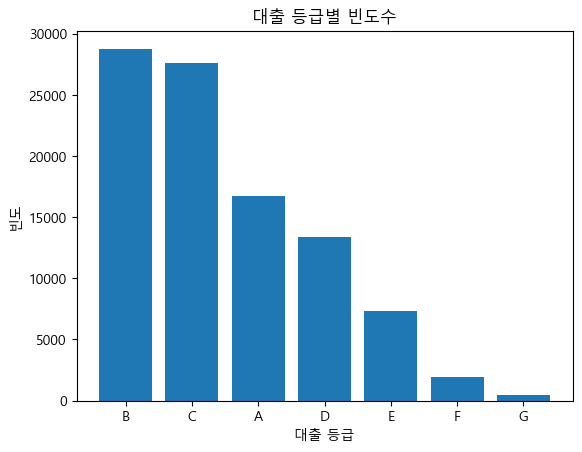

In [453]:
grade = train_df['대출등급'].value_counts()

# 그래프 그리기
plt.bar(grade.index, grade.values)
plt.xlabel('대출 등급')
plt.ylabel('빈도')
plt.title('대출 등급별 빈도수')
plt.show()

In [454]:
grade

대출등급
B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: count, dtype: int64

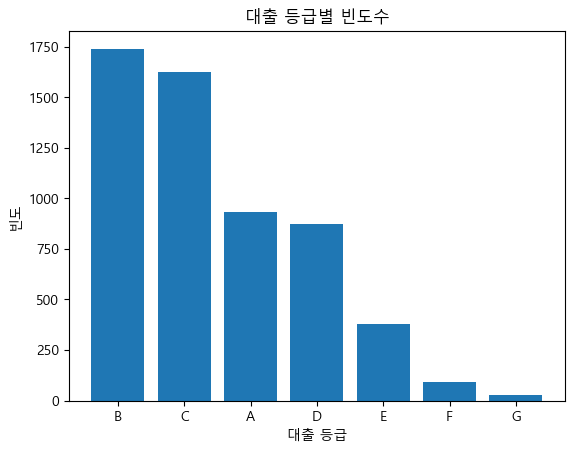

In [455]:
un_grade = unknown['대출등급'].value_counts()

# 그래프 그리기
plt.bar(un_grade.index, un_grade.values)
plt.xlabel('대출 등급')
plt.ylabel('빈도')
plt.title('대출 등급별 빈도수')
plt.show()

In [456]:
grade/un_grade
# 16.98이 평균(전체/unknown값 개수) -> 높을수록 unknown에선 수가 적음을 의미
# unknown이 E,F 비율이 상대적으로 높은 편이나 A도 비율이 높은 편이기 때문에 unknown을 그대로 두고 진행하는 게 나아보임

대출등급
B    16.542480
C    16.967445
A    17.957173
D    15.314220
E    19.455026
F    21.239130
G    16.800000
Name: count, dtype: float64

In [457]:
from scipy.stats import entropy

# KL-divergence를 사용한 분포 유사성 검정(교수님 확인 필요)
# KL-발산 계산
kl_divergence = entropy(grade, un_grade)
kl_divergence
# 결국엔 하나의 변수에서 A,B..G들의 빈도를 확률이라고 생각하여 ..? 확률분포라고 생각할 수 없나..?

0.0022845223066883867

In [458]:
# 주택소유상태
train_df['주택소유상태'].value_counts()

주택소유상태
MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: count, dtype: int64

In [459]:
train_df[train_df['주택소유상태']=='ANY']

대출금액  대출기간 근로기간 주택소유상태      연간소득  부채_대비_소득_비율  총계좌수 대출목적  \
ID                                                                          
TRAIN_28730  41160000  36.0   10    ANY  93600000        17.71    20   기타   

             최근_2년간_연체_횟수  총상환원금  총상환이자  총연체금액  연체계좌수 대출등급  
ID                                                          
TRAIN_28730             0      0    0.0    0.0    0.0    C

In [460]:
test_df['주택소유상태'].value_counts()

주택소유상태
MORTGAGE    31739
RENT        25281
OWN          7177
Name: count, dtype: int64

In [461]:
# test에서 주택소유상태 Any가 없고, train에서도 하나 밖에 없기 때문에 제거
train_df = train_df[train_df['주택소유상태'] !='ANY']

In [462]:
# 대출목적 
train_df['대출목적'].value_counts()

대출목적
부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4724
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: count, dtype: int64

In [463]:
test_df['대출목적'].value_counts()
# 결혼은 제거
test_df = test_df[test_df['대출목적']!='결혼']

In [464]:
test_df

대출금액  대출기간 근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
ID                                                                        
TEST_00000  16800000  36.0    8  MORTGAGE  132000000        19.64    12   
TEST_00001   8400000  36.0    5      RENT   89971200        15.84    25   
TEST_00002  17280000  36.0    6      RENT  150000000         8.41    20   
TEST_00003  14400000  36.0    5  MORTGAGE   66000000        13.72    30   
TEST_00004  27600000  36.0    5      RENT   55200000        30.50    12   
...              ...   ...  ...       ...        ...          ...   ...   
TEST_64192  30000000  36.0    3  MORTGAGE   78000000        22.08    27   
TEST_64193  30000000  60.0   10  MORTGAGE  109200000        12.06    26   
TEST_64194   6120000  36.0   10      RENT   39600000        28.80    33   
TEST_64195  11520000  36.0   10  MORTGAGE   66000000        25.44    41   
TEST_64196   6000000  36.0    9      RENT  180000000         9.07    10   

             대출목적  최근_2년간_연체_횟수    총상환원금      총상환이자  총연체금액  연체계좌수  
ID                                                                 
TEST_00000  주택 개선             0   394692   146604.0    0.0    0.0  
TEST_00001  부채 통합             0        0        0.0    0.0    0.0  
TEST_00002  신용 카드             0  1786980   281820.0    0.0    0.0  
TEST_00003  신용 카드             1   669024   281724.0    0.0    0.0  
TEST_00004  신용 카드             0  1250052   614844.0    0.0    0.0  
...           ...           ...      ...        ...    ...    ...  
TEST_64192  부채 통합             2  1307532   763380.0    0.0    0.0  
TEST_64193  부채 통합             0   960612  1245252.0    0.0    0.0  
TEST_64194  부채 통합             0   131520    80880.0    0.0    0.0  
TEST_64195  부채 통합             1  1339536   601872.0    0.0    0.0  
TEST_64196  부채 통합             0   308880    48960.0    0.0    0.0  

[64196 rows x 13 columns]

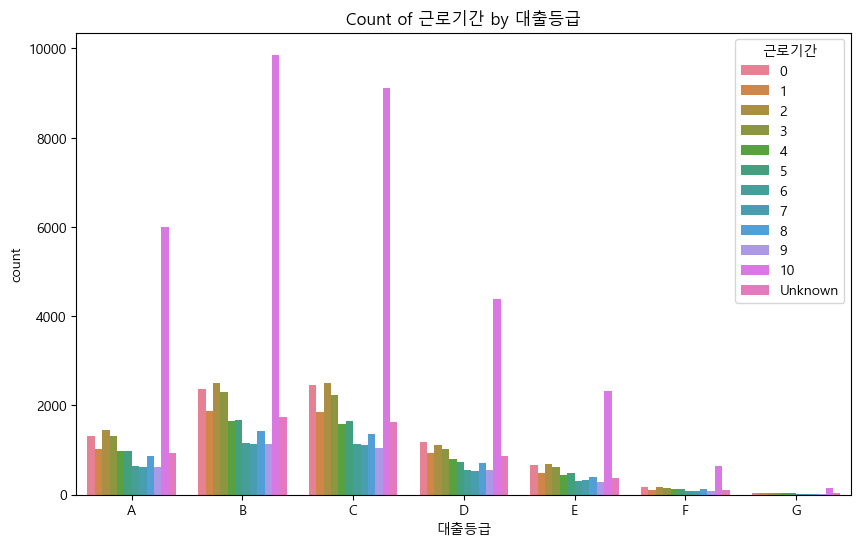

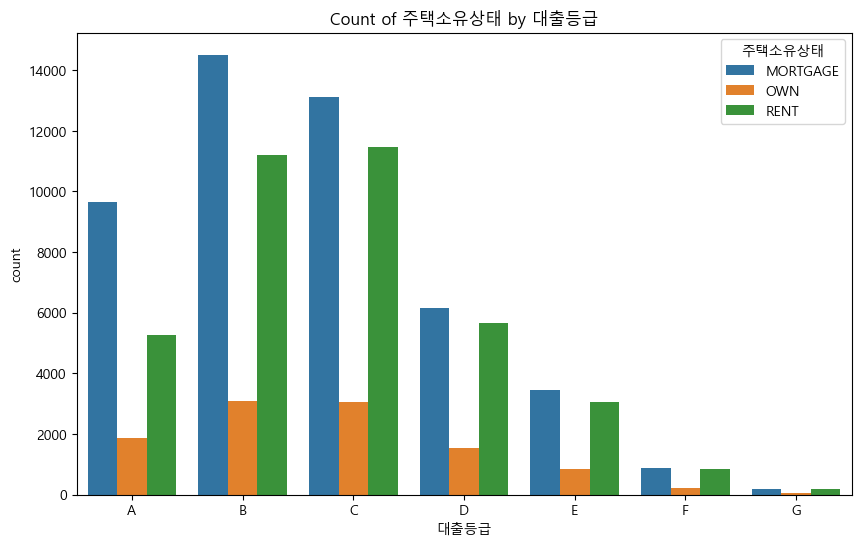

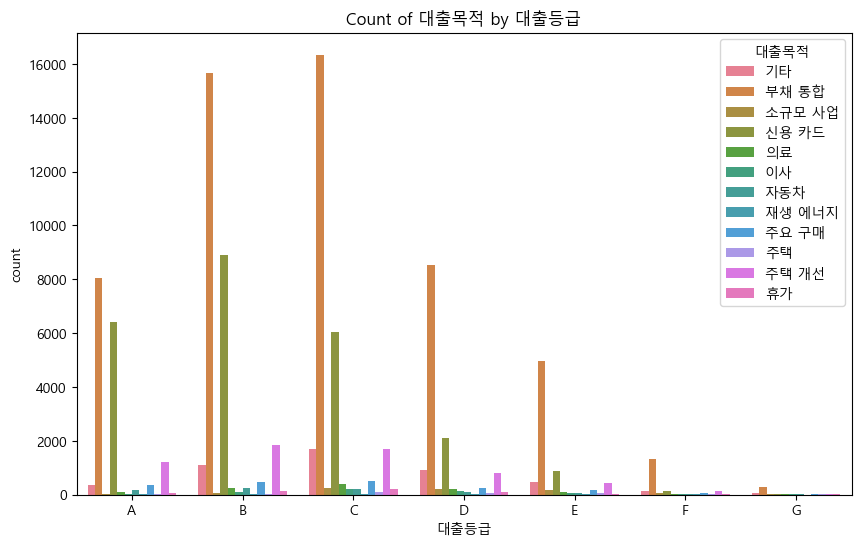

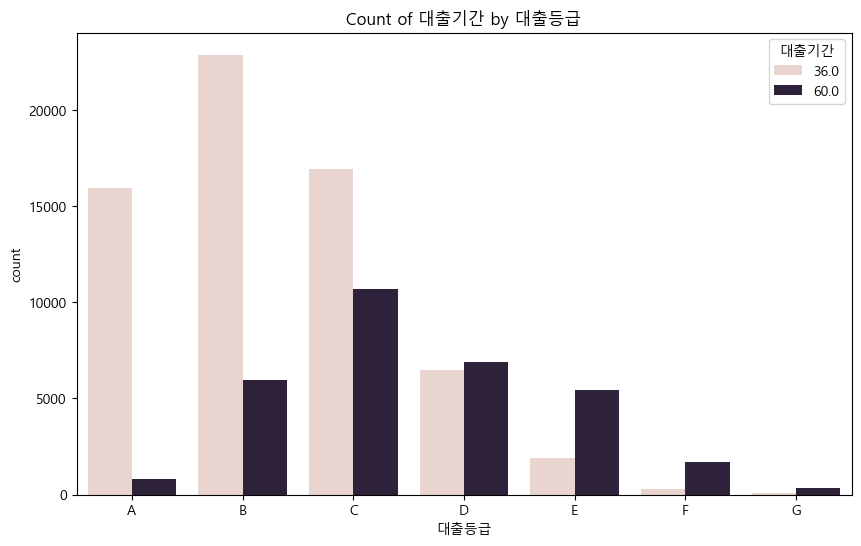

In [465]:
# object 변수들 막대그래프

for column in ['근로기간', '주택소유상태', '대출목적', '대출기간']: 
    count_data = train_df.groupby(['대출등급', column]).size().reset_index(name='count')

    plt.figure(figsize=(10, 6))
    sns.barplot(x='대출등급', y='count', hue=column, data=count_data)
    plt.title(f'Count of {column} by 대출등급')
    plt.show()

## Numerical Variable

In [466]:
train_df.columns

Index(['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수', '대출목적',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')

In [467]:
grade_group=train_df.groupby('대출등급',group_keys=True).apply(lambda x:x)
grade_group

대출금액  대출기간 근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
대출등급 ID                                                                         
A    TRAIN_00002  12000000  36.0    5  MORTGAGE   96000000         8.60    14   
     TRAIN_00005   4800000  36.0   10      RENT   84000000        13.78    30   
     TRAIN_00013  12000000  36.0   10  MORTGAGE   48000000        11.94    11   
     TRAIN_00017   9600000  36.0    8      RENT   74400000        11.98    35   
     TRAIN_00021   8400000  36.0    7  MORTGAGE   42000000        19.00    22   
...                    ...   ...  ...       ...        ...          ...   ...   
G    TRAIN_94294  17130000  60.0    7  MORTGAGE   50400000        21.23    25   
     TRAIN_94324  29100000  60.0    3  MORTGAGE   76800000        18.24    32   
     TRAIN_94543  42000000  60.0    4      RENT  114000000        10.30    12   
     TRAIN_95477  30000000  60.0    1  MORTGAGE  120000000        18.05    14   
     TRAIN_95658  10590000  36.0   10  MORTGAGE   31200000        29.59    19   

                   대출목적  최근_2년간_연체_횟수   총상환원금      총상환이자  총연체금액  연체계좌수 대출등급  
대출등급 ID                                                                      
A    TRAIN_00002  부채 통합             0  928644   151944.0    0.0    0.0    A  
     TRAIN_00005     휴가             0  240216    55428.0    0.0    0.0    A  
     TRAIN_00013  부채 통합             1  303972    58236.0    0.0    0.0    A  
     TRAIN_00017  부채 통합             0  476016   116268.0    0.0    0.0    A  
     TRAIN_00021  주택 개선             0  850164   179196.0    0.0    0.0    A  
...                 ...           ...     ...        ...    ...    ...  ...  
G    TRAIN_94294     기타             0  398892  1176840.0    0.0    0.0    G  
     TRAIN_94324  신용 카드             0  711108  1926708.0    0.0    0.0    G  
     TRAIN_94543  부채 통합             0  665388  2009016.0    0.0    0.0    G  
     TRAIN_95477  부채 통합             0  490824  1266156.0    0.0    0.0    G  
     TRAIN_95658  부채 통합             0  799176   921204.0    0.0    0.0    G  

[96293 rows x 14 columns]

<Axes: xlabel='총상환원금', ylabel='총상환이자'>

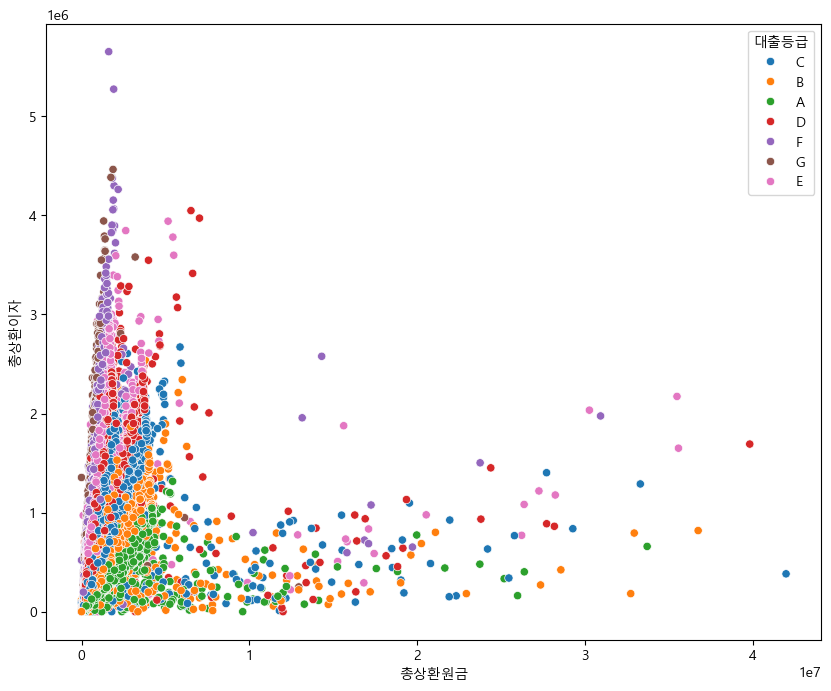

In [468]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_df,x ='총상환원금',y='총상환이자', hue= '대출등급')
# 총상환원금이 작을수록 대출등급이 낮은 경향

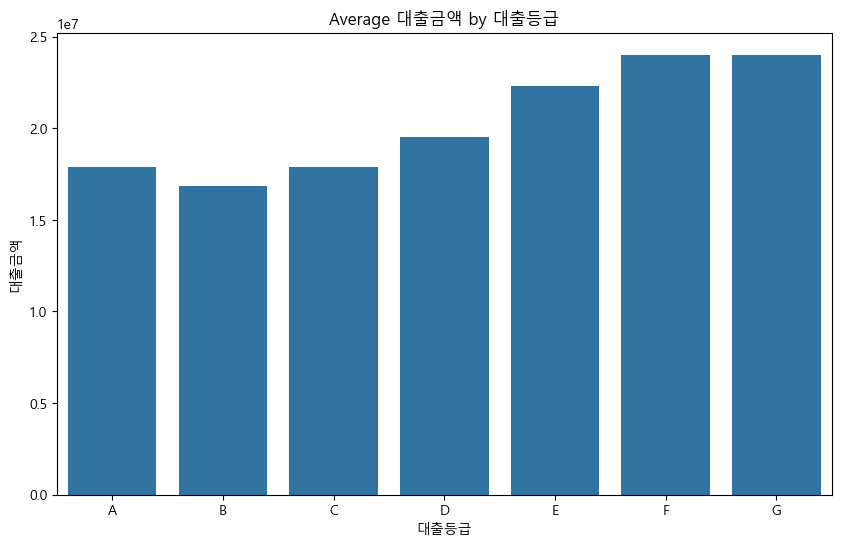

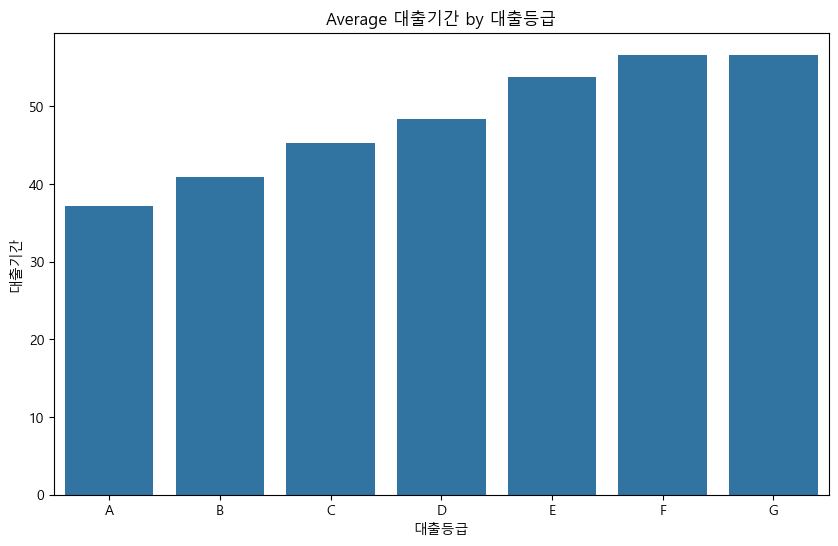

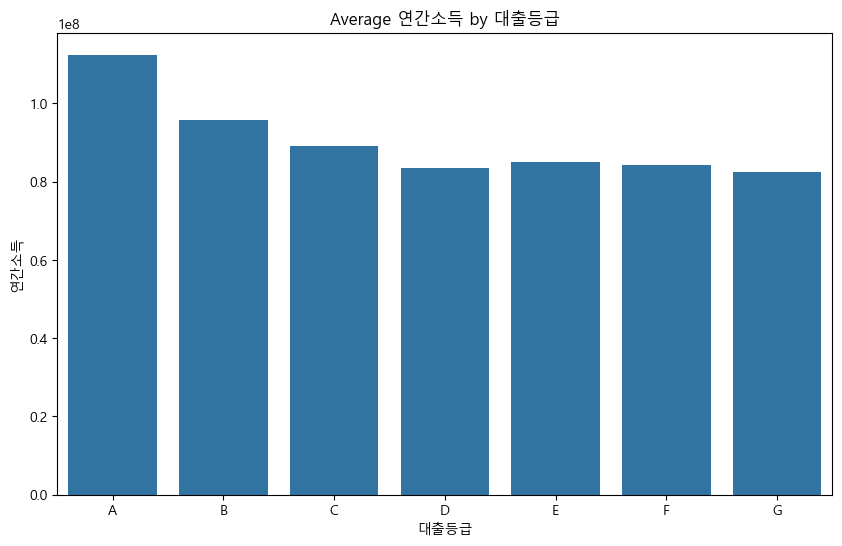

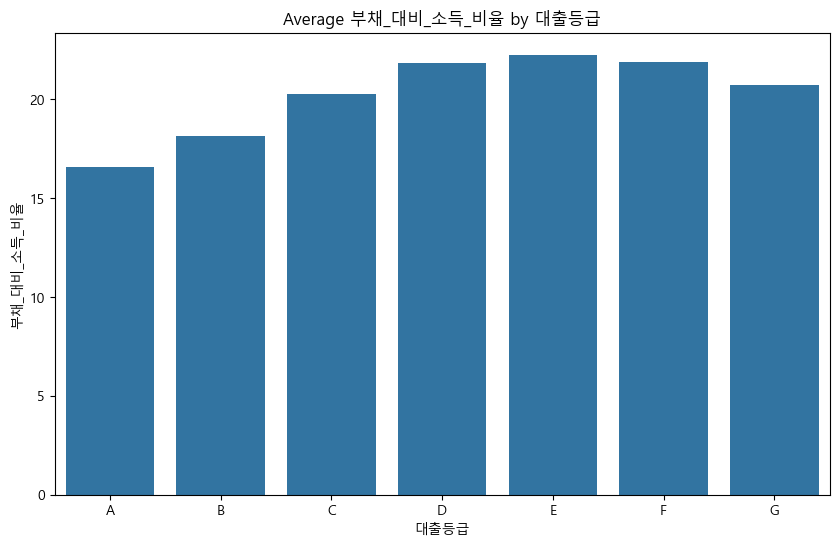

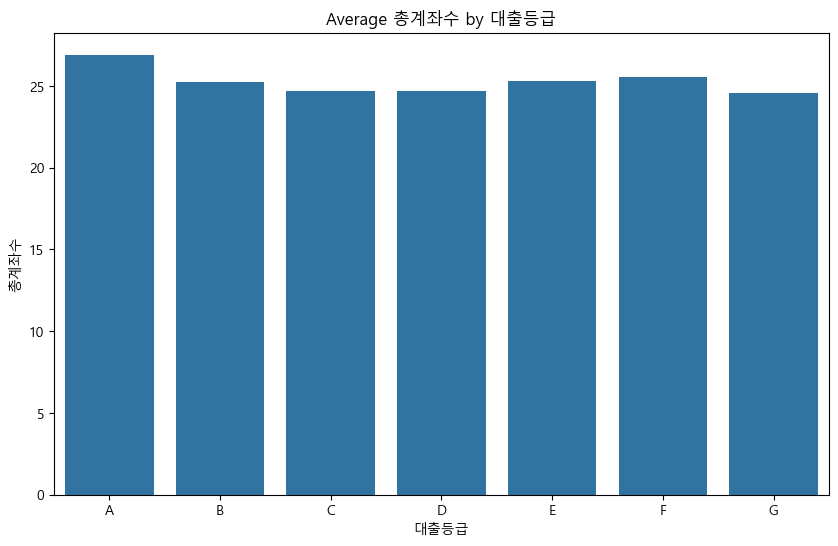

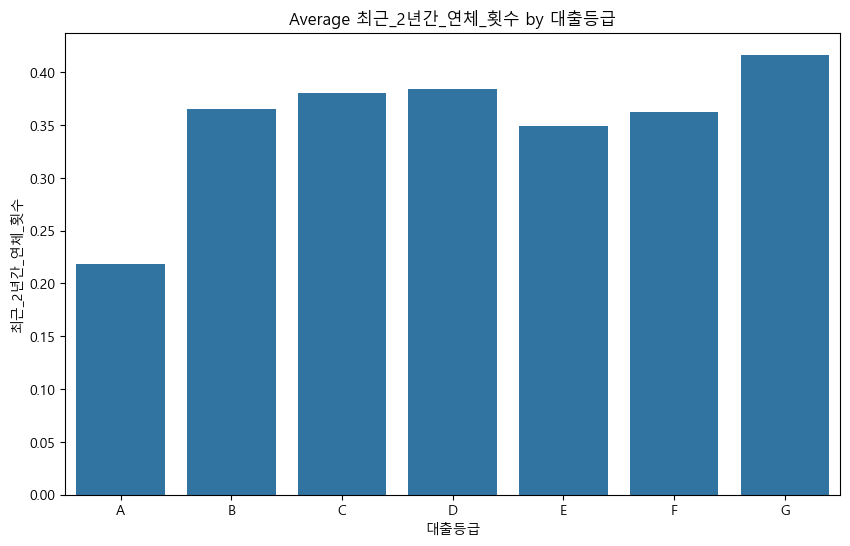

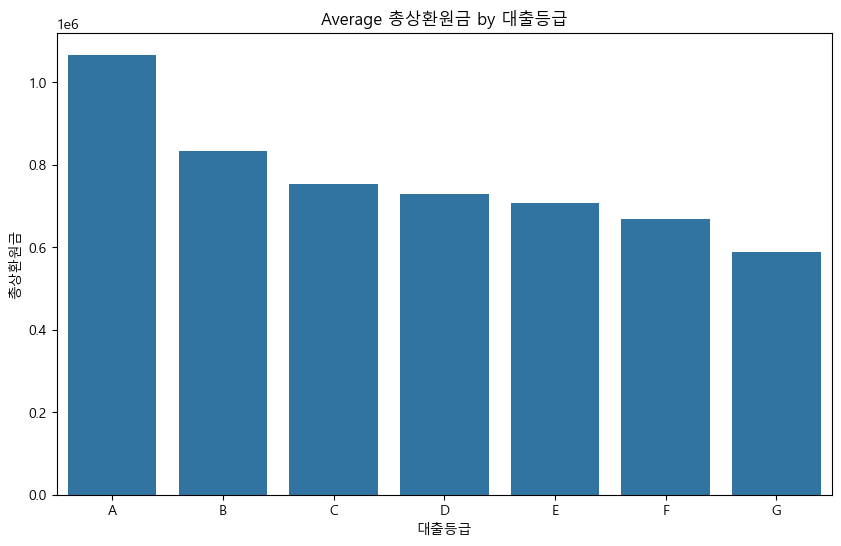

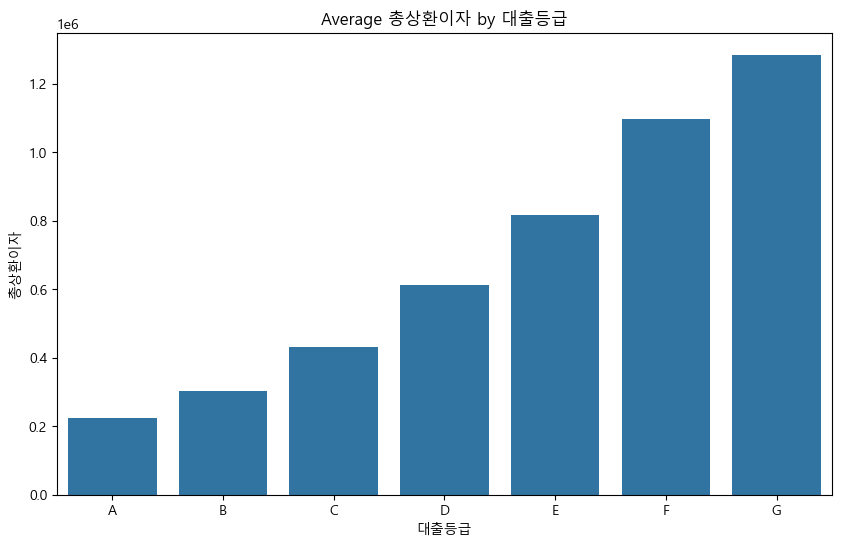

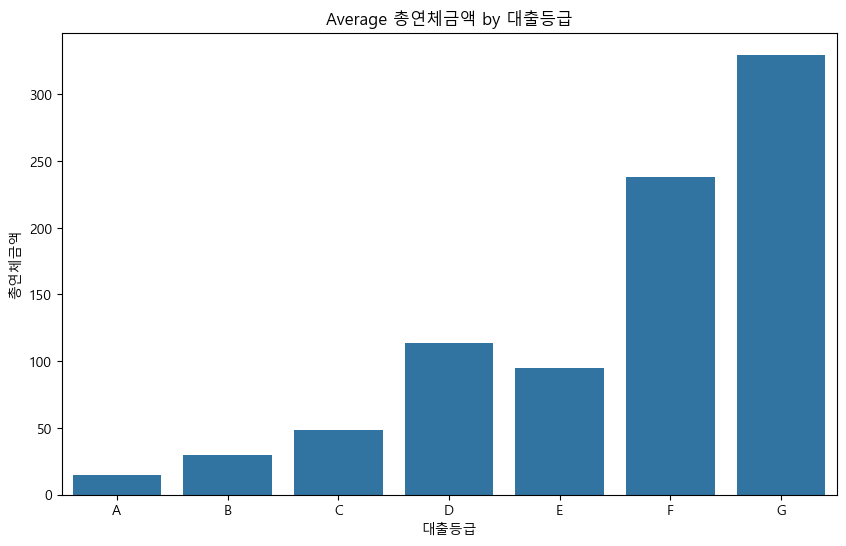

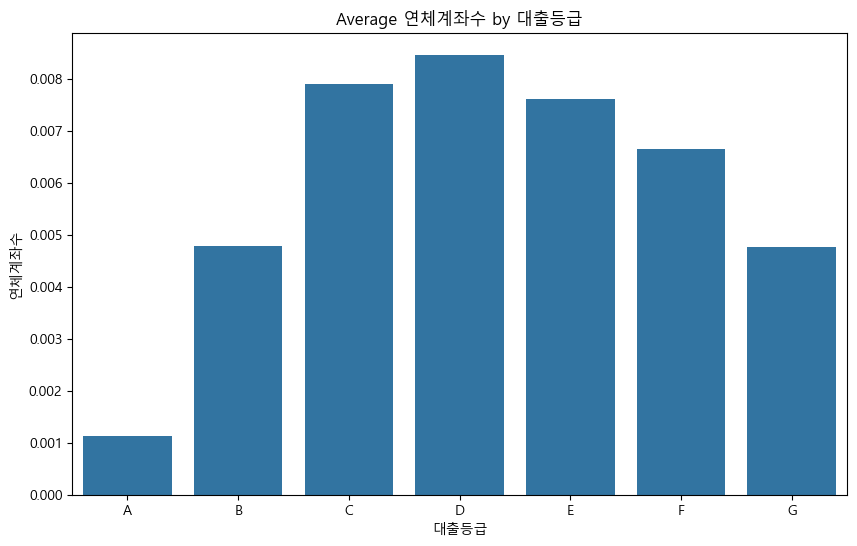

In [469]:
# numerical 변수들 막대그래프

for column in ['대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수',
       '총상환원금', '총상환이자', '총연체금액', '연체계좌수']:
        grouped_data = train_df[['대출등급', column]].groupby('대출등급').mean().reset_index()
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='대출등급', y=column, data=grouped_data)
        plt.title(f'Average {column} by 대출등급')
        plt.show()

대출금액 - A이후로는 등급이 낮아질수록 대출금액이 높아짐
(A는 소득이 높으니깐 대출도 그만큼 많이 해주기 때문으로 생각)

대출기간 - 대출등급이 낮아질수록 대출기간이 길다. -> 연체가 길어지기 때문??

연간소득 - 확실이 대출등급이 높을수록 소득이 높다. 특히, A는 압도적

부채대비 소득비율 - 점점 올라가다가 다시 낮아지는데 이는 F, G에서 소득 자체가 매우 낮기 때문으로 생각
-> E까지는 그래도 그나마 소득 비율을 안정적으로 생각하는 것 같음 

총계좌수 - A가 많긴하나 상대적으로 그렇게 중요해보이지는 않는 변수

최근 2년간 연체 횟수 -> A는 압도적으로 연체횟수가 적음/G는 압도적으로 높음

총상환원금 - 완전 대출등급과 비례해서 상환원금금액이 많아짐 

총상환이자 - 완전 대출등급이 낮아질수록 총상환이자가 늘어남

총연체금액 - E를 제외하면 등급이 낮아질수록 총 연체금액이 많음
-> E는 2년간 연체횟수도 적고 부채대비 소득비율도 높고 총연체금액도 적음 

연체계좌수 - D의 연체계좌수가 많으나 Y축으로 봤을 때 크게 차이가 많다고는 할 수 없어보임
-> 일반적으로 25개의 계좌를 가지고 있다고 볼 때 0.001은 1/1000이므로 25개 중 1/40개에서 발생한다는 뜻

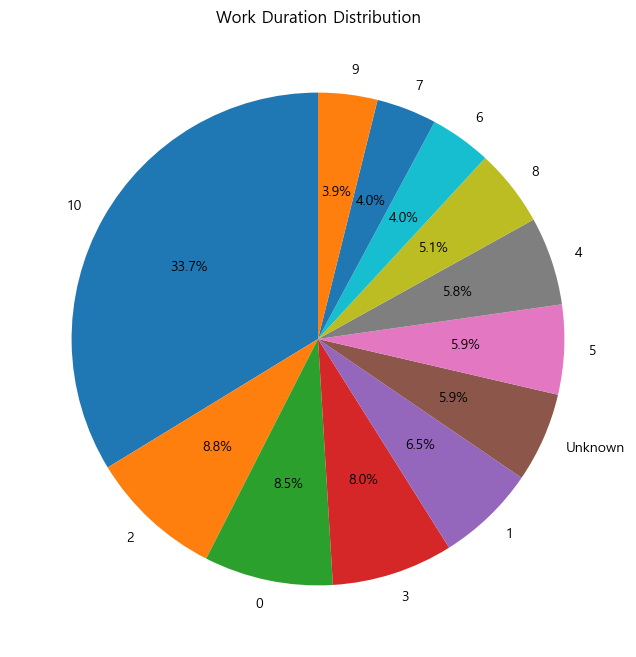

In [470]:
work_duration_counts = train_df['근로기간'].value_counts()
plt.figure(figsize=(10, 8))  
work_duration_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)  
plt.title('Work Duration Distribution')  
plt.ylabel('')  
plt.show()  

# 10년 이상 근로한 사람이 많음

지금 신용등급이 낮은 데이터가 현저하게 적음
반대로 A등급 같은 경우 10+ 많이 나타남
우리가 가지고 있는데이터에는 근무 기간 10년 이상이 가장 많음 주의해서 봐야함>>신용등급A가 10+ 나왔다고 유의미한가? 단순이 10+데이터가 많아서 나온거 일 수도 있음

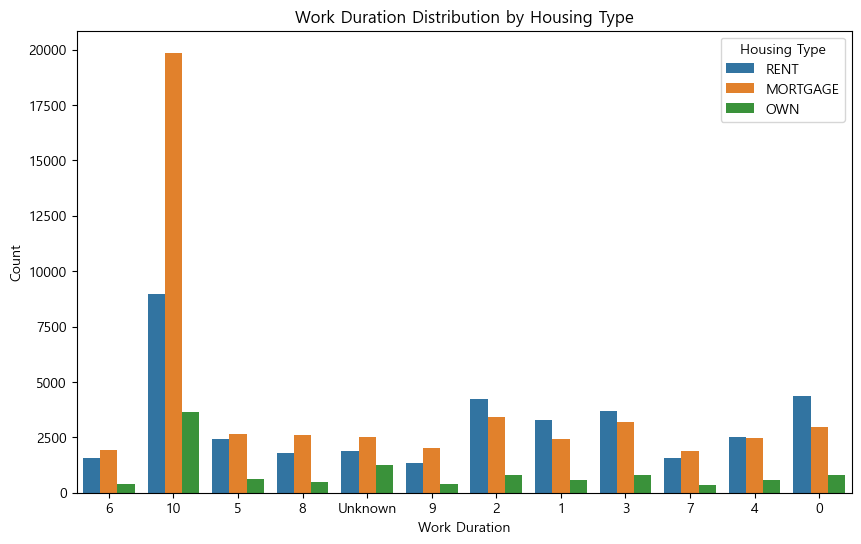

In [471]:
plt.figure(figsize=(10, 6))
sns.countplot(x='근로기간', hue='주택소유상태', data=train_df)
plt.title('Work Duration Distribution by Housing Type')
plt.xlabel('Work Duration')
plt.ylabel('Count')
plt.legend(title='Housing Type')
plt.show()

근무 기간 별로 주택의 소유 상태를 확인해봄
모기지의 형태가 10+ 앞도적으로 나오는 상태임, 다른 근무기간에서는 찾기 힘듬
반대로 근무기간이 낮으면 랜트의 형식이 많음
이는 10+ 고수익은 안정적으로 주택담보로 대출이 가능하다는 것을 나타내고, 근무기간이 낮은 사람들은 그것이 불가능하다는 것을 알려주고 있음.
결론 기관에서 대출을 해줄땐 근무기간이 길면 장기적으로 안정적으로 받을수 있는 모기지, 근무기간이 낮으면 단기로 확실하게 받아야하는 랜트임

C:\Users\DOHS\AppData\Local\Temp\ipykernel_6228\2676173365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['대출등급'] = pd.Categorical(train_df['대출등급'], categories=sorted(train_df['대출등급'].unique()))
C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


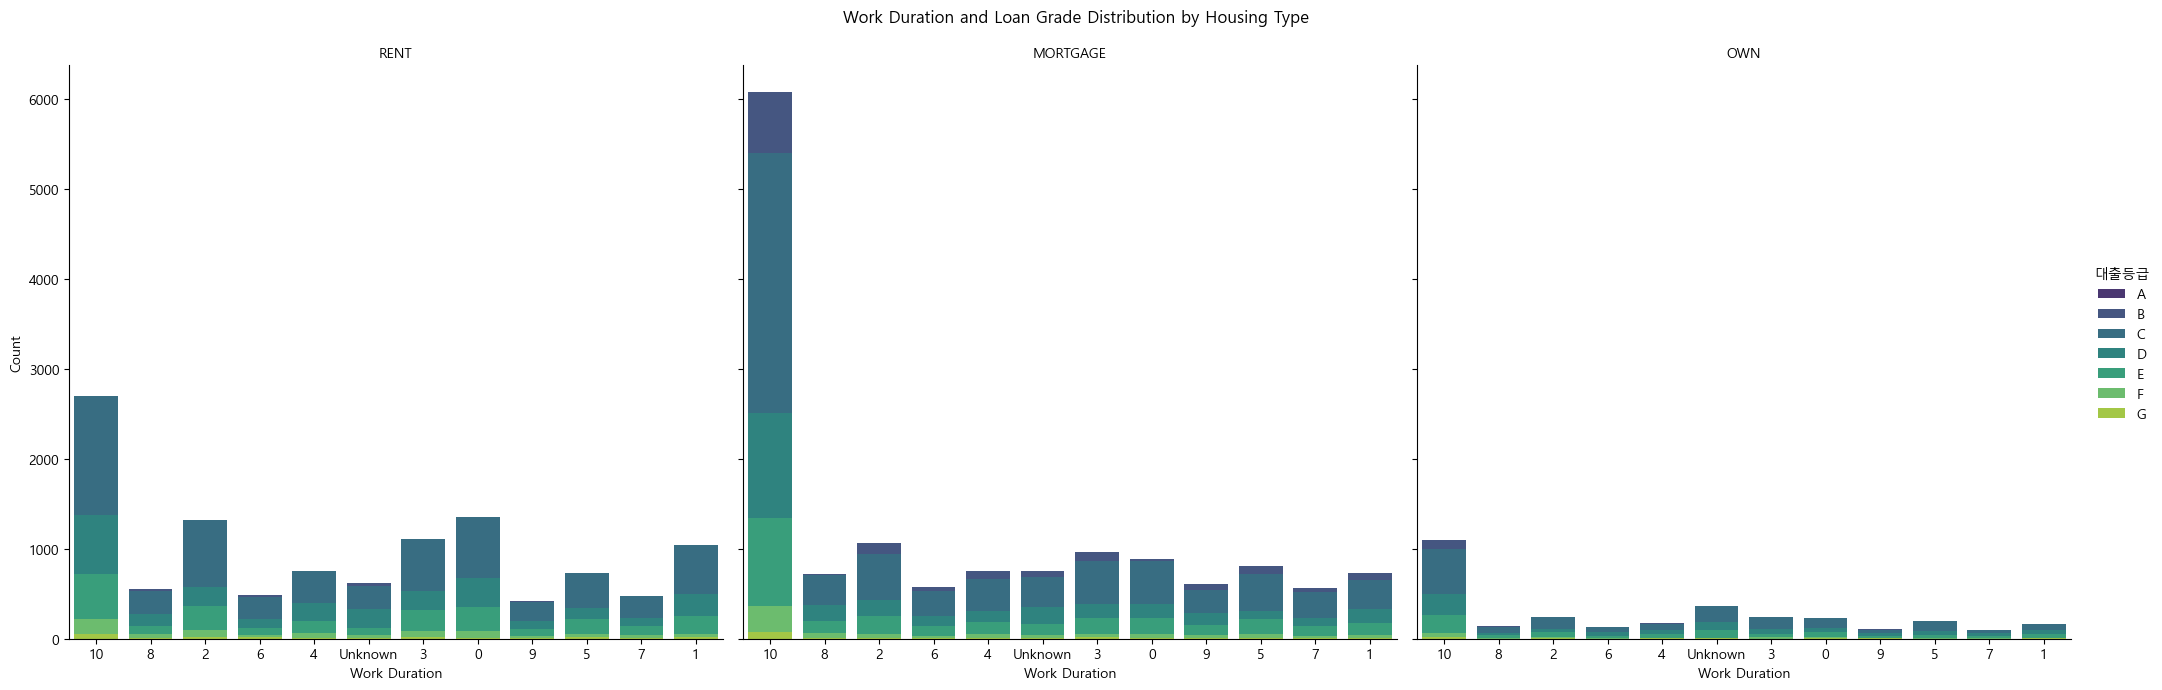

In [472]:

train_df['대출등급'] = pd.Categorical(train_df['대출등급'], categories=sorted(train_df['대출등급'].unique()))

g = sns.FacetGrid(train_df, col="주택소유상태", hue="대출등급", height=7, aspect=1, palette='viridis')

g.map(sns.countplot, "근로기간", hue_order=sorted(train_df['대출등급'].unique()))

g.add_legend(title='대출등급')
g.set_titles("{col_name}")
g.set_xlabels('Work Duration')
g.set_ylabels('Count')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Work Duration and Loan Grade Distribution by Housing Type')

# Display the plot
plt.show()

실제로 주택소유유형별로 신용등급이 어떻게 포진되어있는지 확인해볼 필요가 있음
예상한 결과대로 안정적으로 길게 받을수 있는 유형인 10+ 모기지 형태는 기관에서 A 신용등급을 받고있음
신용등급 A는 [모기지]에서만 보이는 특징임
근무년수에 따른 나머지 신용등급 분포는 고르게 분포되어있음

C:\Users\DOHS\AppData\Local\Temp\ipykernel_6228\288332655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['대출등급'] = pd.Categorical(train_df['대출등급'], categories=sorted(train_df['대출등급'].unique()))
C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


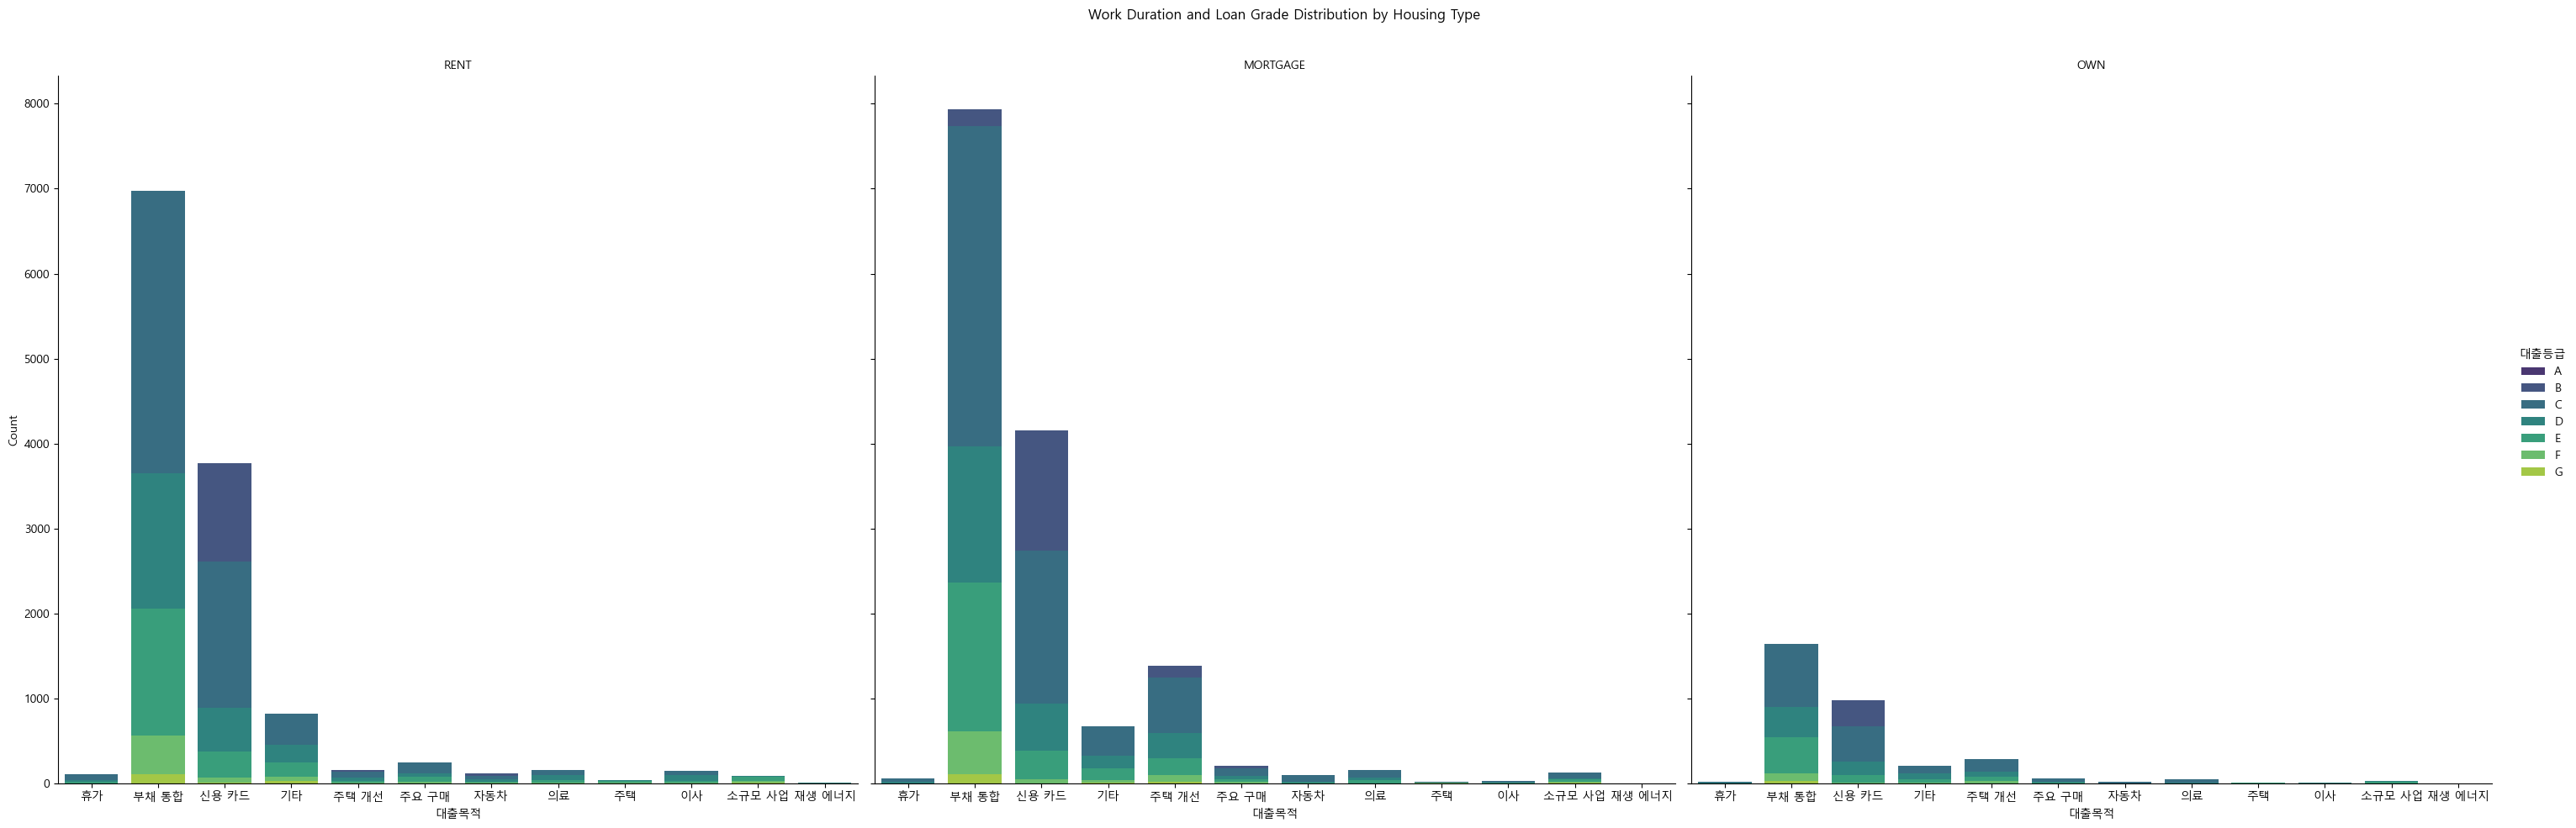

In [473]:

train_df['대출등급'] = pd.Categorical(train_df['대출등급'], categories=sorted(train_df['대출등급'].unique()))

g = sns.FacetGrid(train_df, col="주택소유상태", hue="대출등급", height=10, aspect=1, palette='viridis')

g.map(sns.countplot, "대출목적", hue_order=sorted(train_df['대출등급'].unique()))

g.add_legend(title='대출등급')
g.set_titles("{col_name}")
g.set_xlabels('대출목적')
g.set_ylabels('Count')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Work Duration and Loan Grade Distribution by Housing Type')

# Display the plot
plt.show()

주택소유를 좀더 잘 관찰하기 위해 유형별 어떤 대출유형을 주로 하는 지 파악해봄
의미있는 파악은 못했지만
유독 신용카드에서 신용등급이 많이 나옴
신용카드 부분에서 A 는 종류없이 존재함
낮은 신용등급의 판단은 부채 통합에서 결정되는 거 같음

Text(0, 0.5, '대출 건수')

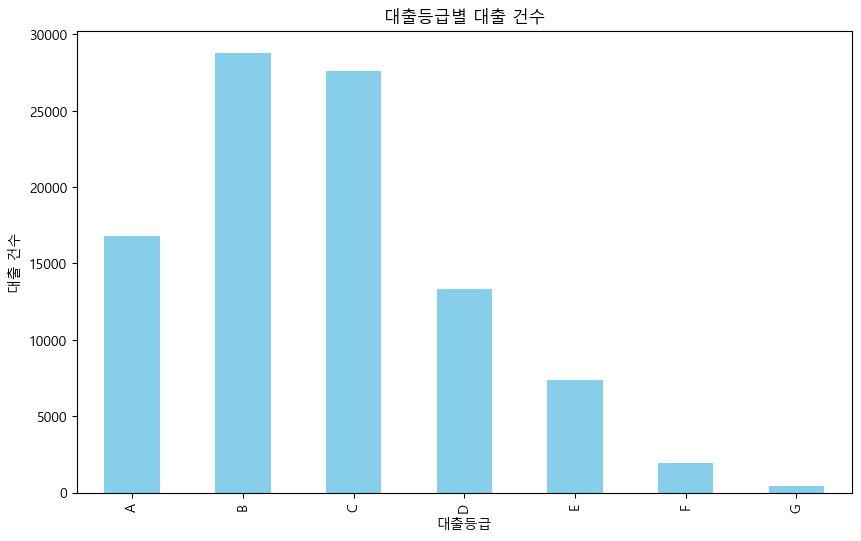

In [474]:
hist = train_df['대출등급'].value_counts().sort_index()

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
hist.plot(kind='bar', color='skyblue')

# 그래프 제목과 축 레이블 설정
plt.title('대출등급별 대출 건수')
plt.xlabel('대출등급')
plt.ylabel('대출 건수')

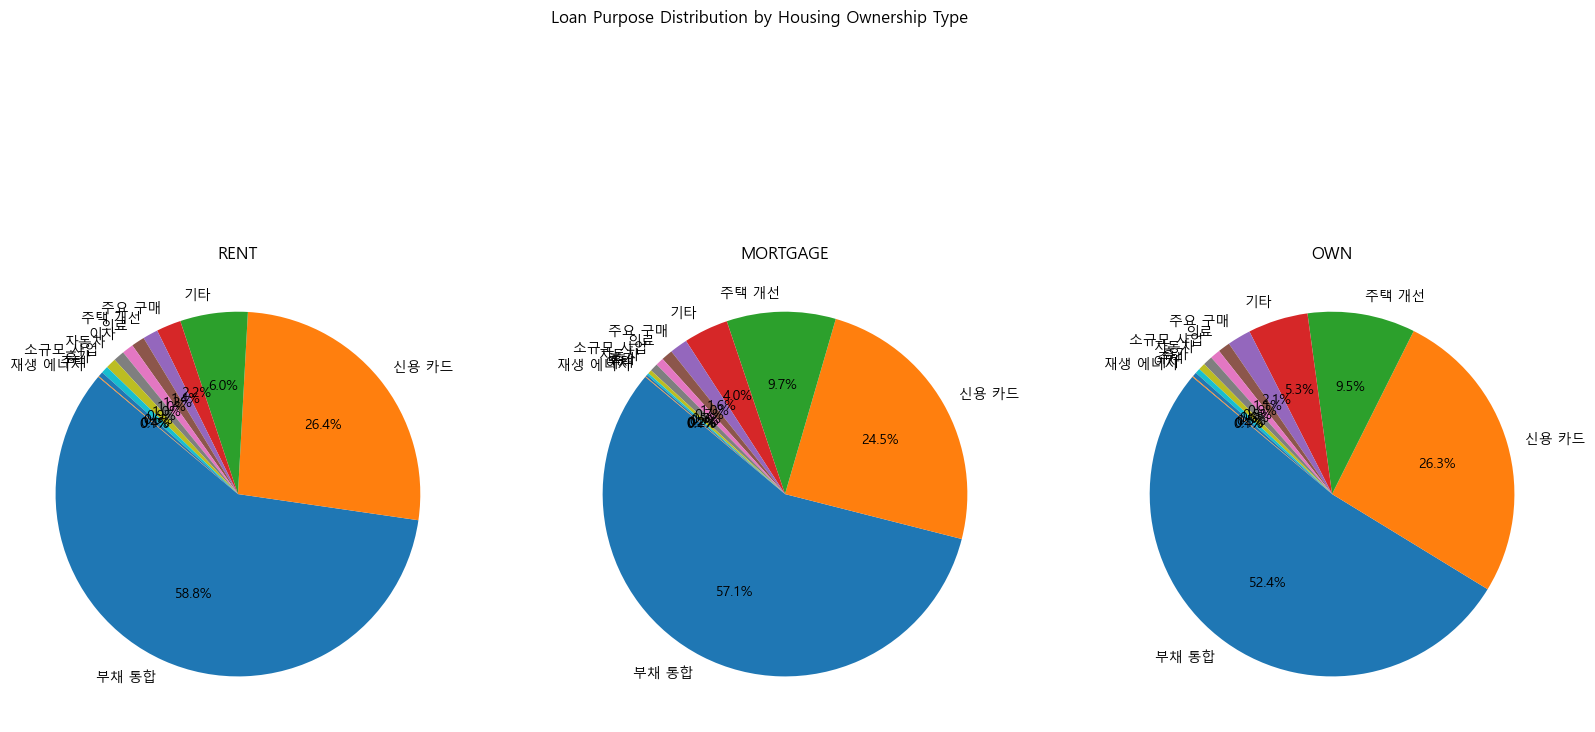

In [475]:
grouped = train_df.groupby('주택소유상태')['대출목적'].value_counts(normalize=True)

unique_housing_types = train_df['주택소유상태'].unique()
fig, axes = plt.subplots(1, len(unique_housing_types), figsize=(20, 10))

for ax, housing_type in zip(axes, unique_housing_types):

    data = grouped[housing_type]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(housing_type)

plt.suptitle('Loan Purpose Distribution by Housing Ownership Type')
plt.show()

그러면 실제로 다들 신용카드에 사용이 많은가 확인해 봤음, 적은대도 많으면 신용카드로 신용평가가 이루어지나 생각했음
예상대로 큰 비중을 차지하고 있고 나머진 부채통합을 가장 큰 대출유형으로 대출하고있음
즉 , 대출 비중이 가장 많은건 부채 통합 ,A등급을 판단 하는 요소는 신용카드인거 같음(추측)

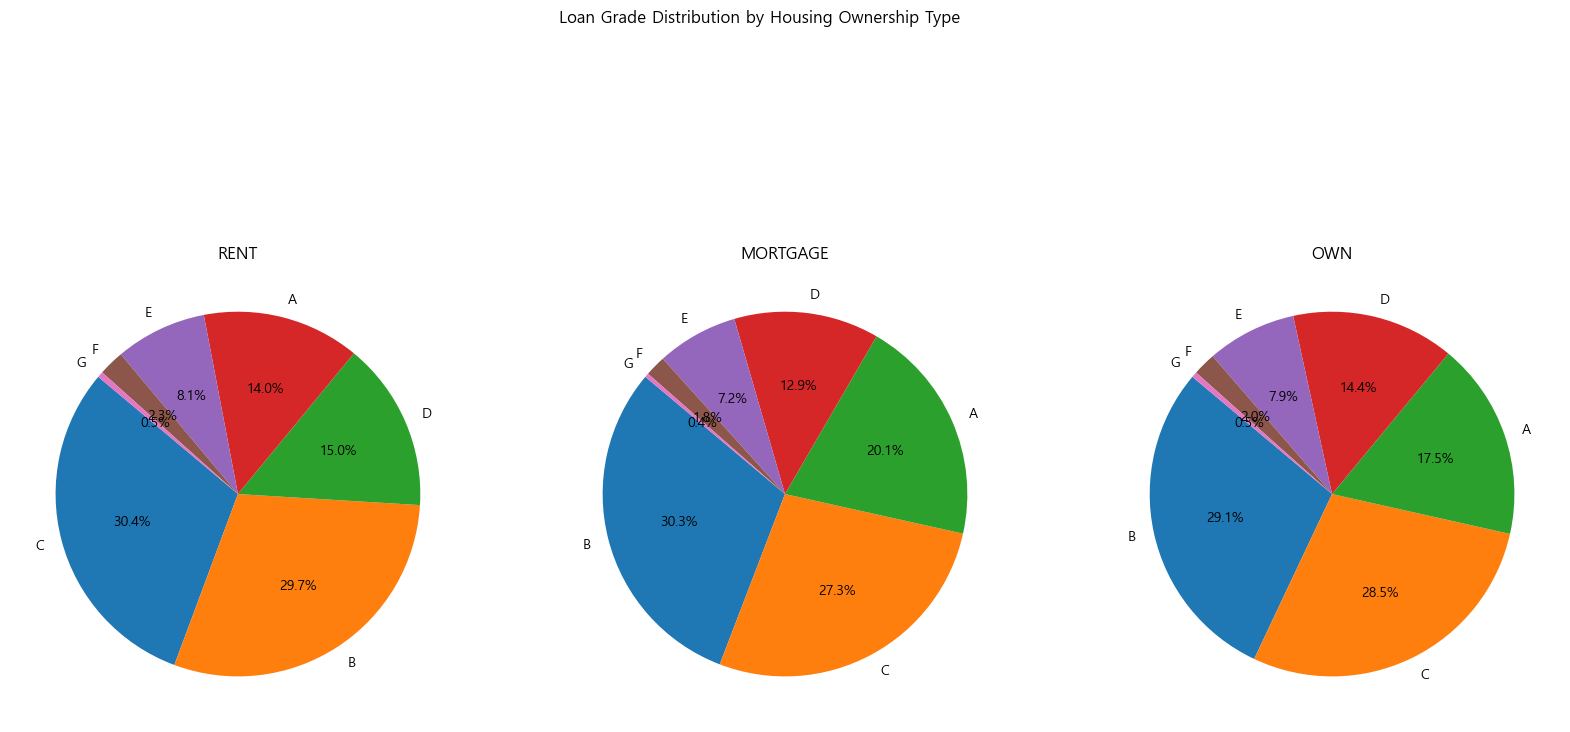

In [476]:

grouped = train_df.groupby('주택소유상태')['대출등급'].value_counts(normalize=True)

unique_housing_types = train_df['주택소유상태'].unique()
fig, axes = plt.subplots(1, len(unique_housing_types), figsize=(20, 10))

for ax, housing_type in zip(axes, unique_housing_types):
    data = grouped[housing_type]
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(housing_type)
plt.suptitle('Loan Grade Distribution by Housing Ownership Type')
plt.show()

C:\Users\DOHS\AppData\Local\Temp\ipykernel_6228\4128870903.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_housing = train_df.groupby(['대출등급', '주택소유상태']).size().unstack().fillna(0)


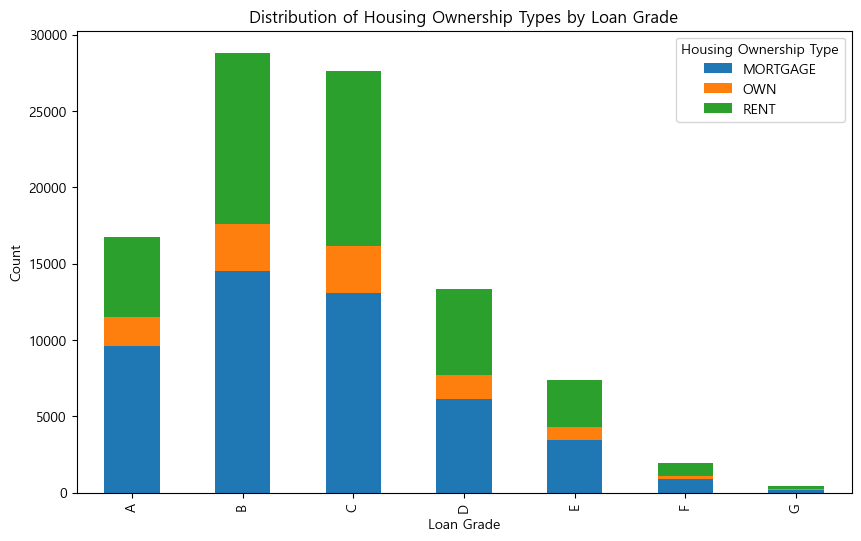

In [477]:
grouped_housing = train_df.groupby(['대출등급', '주택소유상태']).size().unstack().fillna(0)

grouped_housing.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of Housing Ownership Types by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Housing Ownership Type')
plt.show()

C:\Users\DOHS\AppData\Local\Temp\ipykernel_6228\3498212537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['근로기간'] = train_df['근로기간'].astype(str)


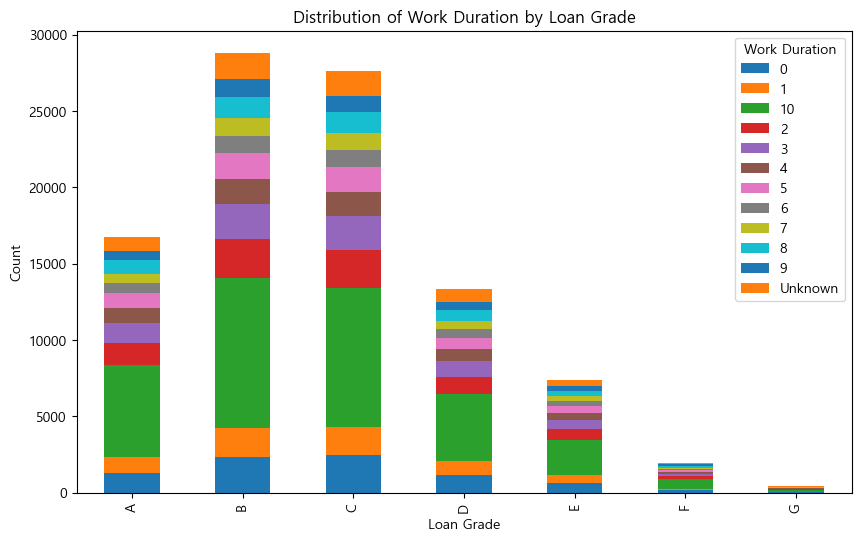

In [478]:
train_df['근로기간'] = train_df['근로기간'].astype(str)

grouped_work = train_df.groupby(['대출등급', '근로기간'], observed=True).size().unstack().fillna(0)

grouped_work.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of Work Duration by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Work Duration', loc='upper right')
plt.show()

위에서 가정이 맞음을 확인 할 수있음
모기지의 형태,10+ 가 가장 좋은 신용등급을 받는 요소인거 같음 (추측)

C:\Users\DOHS\AppData\Local\Temp\ipykernel_6228\3910822066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['대출등급'] = pd.Categorical(train_df['대출등급'], categories=sorted(train_df['대출등급'].unique()))
C:\Users\DOHS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


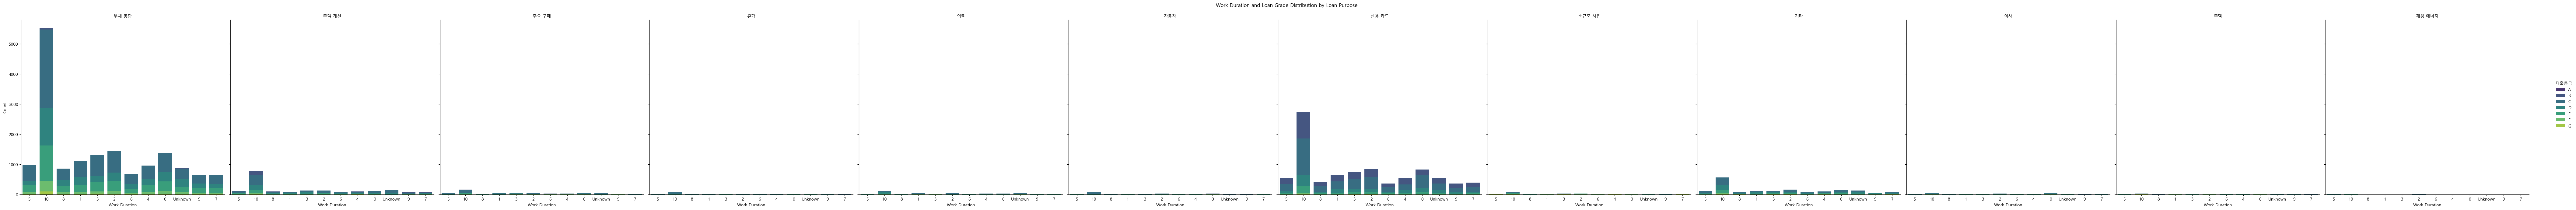

In [479]:
train_df['대출등급'] = pd.Categorical(train_df['대출등급'], categories=sorted(train_df['대출등급'].unique()))

g = sns.FacetGrid(train_df, col="대출목적", hue="대출등급", height=7, aspect=1, palette='viridis')

g.map(sns.countplot, "근로기간", hue_order=sorted(train_df['대출등급'].unique()))

g.add_legend(title='대출등급')
g.set_titles("{col_name}")
g.set_xlabels('Work Duration')
g.set_ylabels('Count')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Work Duration and Loan Grade Distribution by Loan Purpose')

plt.show()

신용카드에 A가 많은 이유는 신용카드의 산정 방식 자체 같음
그리고 느낀 핵심은 부채통합과 신용카드 주택개선 이 셋이 대출을 하는 주 목적임을 알아냈음
10+ 이상의 사람들이 경제 활동이 가장 활발한거 같음 (확인 필요)

위까지는 A등급의 특징들임

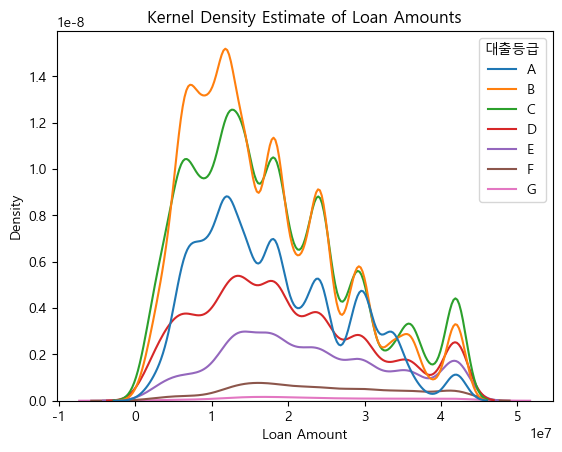

In [480]:
sns.kdeplot(data=train_df, x='대출금액', hue= '대출등급')

plt.title('Kernel Density Estimate of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()
# KDE Plot란 커널밀도추정(Kernel density estimation) 그래프로, hist가 count(절대량)을 표현한다면
# kde plot은 비율(상대량)을 시각화하는 plot입니다.

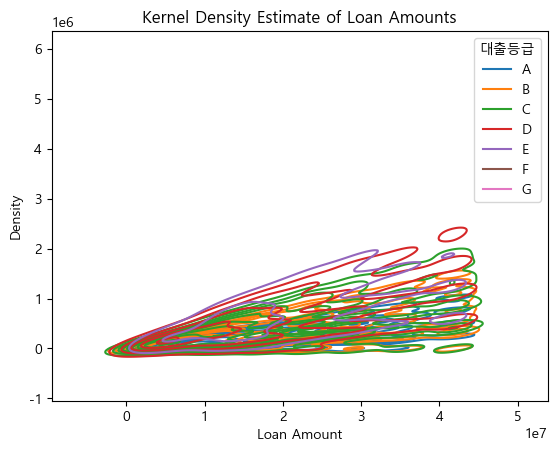

In [481]:
sns.kdeplot(data=train_df, x='대출금액',y='총상환이자', hue= '대출등급')

plt.title('Kernel Density Estimate of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

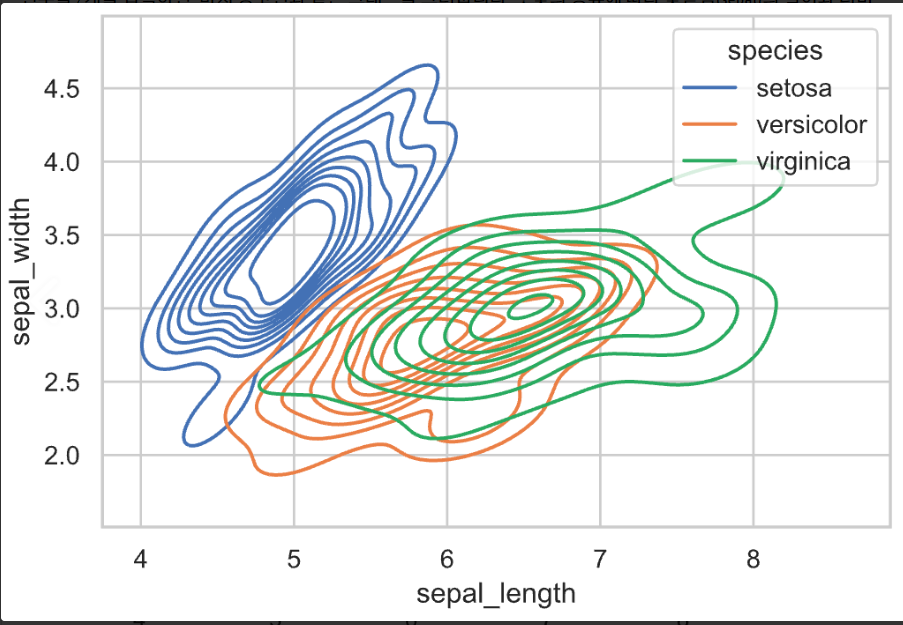

KDE plot에서 두 개의 분포가 잘 나눠져있으면 위와 같은 모습을 보인다. 

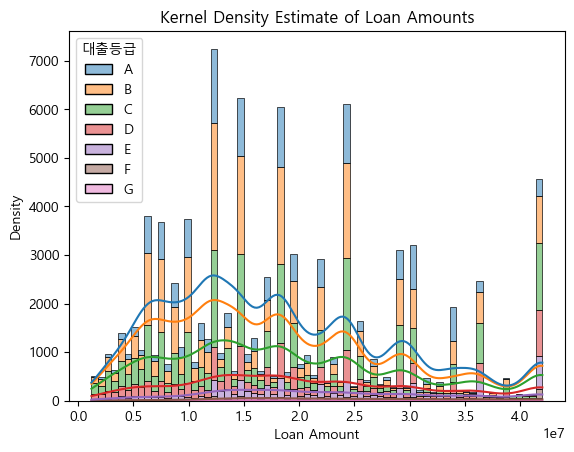

In [482]:
# histplot에 kdeplot를 추가한 시각화 plot
sns.histplot(data=train_df, x='대출금액', multiple='stack', hue= '대출등급', kde=True)

plt.title('Kernel Density Estimate of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

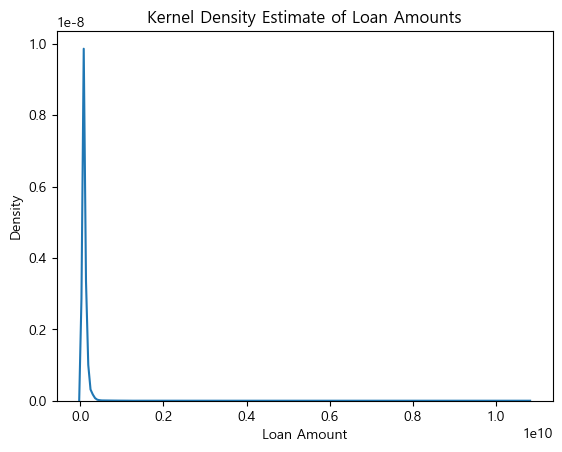

In [483]:
sns.kdeplot(data=train_df, x='연간소득')

plt.title('Kernel Density Estimate of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.show()

In [484]:
train_df['대출금액'].describe()

count    9.629300e+04
mean     1.830376e+07
std      1.032887e+07
min      1.200000e+06
25%      1.020000e+07
50%      1.680000e+07
75%      2.400000e+07
max      4.200000e+07
Name: 대출금액, dtype: float64

In [485]:
train_df['연간소득'].describe()

count    9.629300e+04
mean     9.392673e+07
std      9.956923e+07
min      0.000000e+00
25%      5.760000e+07
50%      7.800000e+07
75%      1.128000e+08
max      1.080000e+10
Name: 연간소득, dtype: float64

In [486]:
train_df['LoanAmountQuartile'] = pd.qcut(train_df['대출금액'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

C:\Users\DOHS\AppData\Local\Temp\ipykernel_6228\3444671491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['LoanAmountQuartile'] = pd.qcut(train_df['대출금액'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


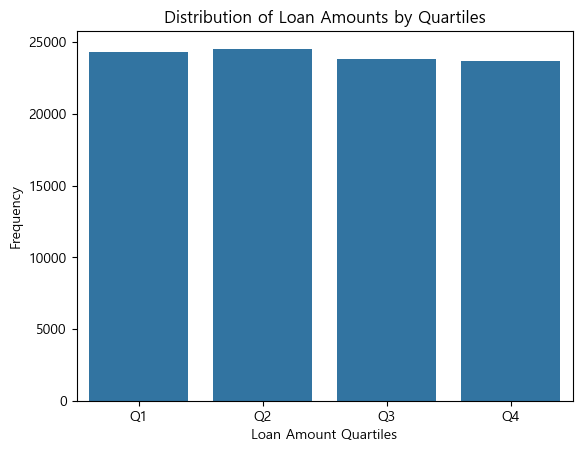

In [487]:
quartile_counts = train_df['LoanAmountQuartile'].value_counts().sort_index()

sns.barplot(x=quartile_counts.index, y=quartile_counts.values)

plt.title('Distribution of Loan Amounts by Quartiles')
plt.xlabel('Loan Amount Quartiles')
plt.ylabel('Frequency')
plt.show()

In [488]:
train_df['yearsincomeQuartile'] = pd.qcut(train_df['연간소득'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

C:\Users\DOHS\AppData\Local\Temp\ipykernel_6228\3960891219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['yearsincomeQuartile'] = pd.qcut(train_df['연간소득'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


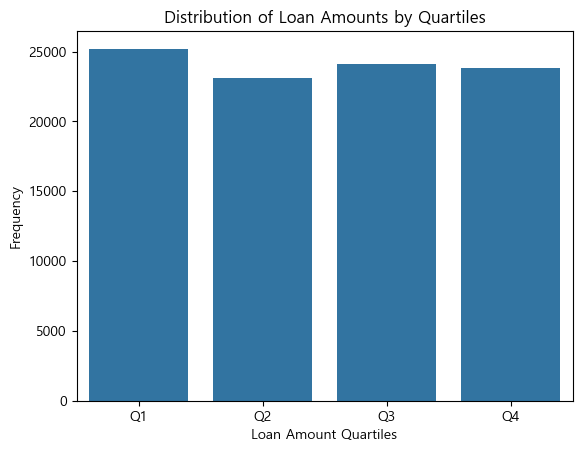

In [489]:
quartile_counts = train_df['yearsincomeQuartile'].value_counts().sort_index()

sns.barplot(x=quartile_counts.index, y=quartile_counts.values)

plt.title('Distribution of Loan Amounts by Quartiles')
plt.xlabel('Loan Amount Quartiles')
plt.ylabel('Frequency')
plt.show()

In [490]:
train_df.pivot_table(index=['근로기간'],columns='대출등급',values=['대출금액','연간소득'],aggfunc='mean')

대출금액                                                          \
대출등급                A             B             C             D             E   
근로기간                                                                            
0        1.745954e+07  1.623307e+07  1.688419e+07  1.882581e+07  2.118948e+07   
1        1.765563e+07  1.597760e+07  1.674177e+07  1.840165e+07  2.121231e+07   
10       1.879930e+07  1.809120e+07  1.951666e+07  2.145480e+07  2.436302e+07   
2        1.725829e+07  1.657941e+07  1.701136e+07  1.888734e+07  2.118432e+07   
3        1.744451e+07  1.644933e+07  1.752903e+07  1.868702e+07  2.136947e+07   
4        1.792455e+07  1.664821e+07  1.751996e+07  1.917113e+07  2.135189e+07   
5        1.734831e+07  1.677005e+07  1.754708e+07  1.879969e+07  2.231229e+07   
6        1.813680e+07  1.641697e+07  1.766768e+07  1.955077e+07  2.378230e+07   
7        1.803688e+07  1.645460e+07  1.789425e+07  1.929191e+07  2.303217e+07   
8        1.730609e+07  1.689832e+07  1.848220e+07  2.004539e+07  2.207166e+07   
9        1.798382e+07  1.750860e+07  1.863143e+07  1.971506e+07  2.203879e+07   
Unknown  1.554639e+07  1.315398e+07  1.332536e+07  1.440162e+07  1.657865e+07   

                                             연간소득                              \
대출등급                F             G             A             B             C   
근로기간                                                                            
0        2.186241e+07  1.938000e+07  1.089115e+08  8.817066e+07  8.522562e+07   
1        2.225400e+07  2.470759e+07  1.066027e+08  9.041137e+07  8.303698e+07   
10       2.630917e+07  2.670263e+07  1.199666e+08  1.058449e+08  9.813179e+07   
2        2.296076e+07  2.333250e+07  1.085316e+08  9.292176e+07  8.539712e+07   
3        2.135784e+07  2.341462e+07  1.128800e+08  9.203984e+07  8.718926e+07   
4        2.486680e+07  2.327880e+07  1.125600e+08  9.565855e+07  8.610673e+07   
5        2.374059e+07  2.516125e+07  1.117908e+08  9.575186e+07  8.936819e+07   
6        2.282153e+07  2.504368e+07  1.168882e+08  9.503406e+07  8.678141e+07   
7        2.424494e+07  1.984091e+07  1.250902e+08  9.689824e+07  8.640570e+07   
8        2.552812e+07  2.664300e+07  1.091748e+08  9.521531e+07  9.349182e+07   
9        2.548059e+07  2.065667e+07  1.126498e+08  9.611901e+07  9.647943e+07   
Unknown  1.655674e+07  1.816320e+07  7.379123e+07  6.281029e+07  5.619573e+07   

                                                                 
대출등급                D             E             F             G  
근로기간                                                             
0        7.648905e+07  7.833257e+07  7.376643e+07  6.425843e+07  
1        7.759490e+07  8.049425e+07  8.146001e+07  9.133672e+07  
10       9.178777e+07  9.205009e+07  9.054751e+07  8.926765e+07  
2        7.980949e+07  8.390610e+07  8.823531e+07  9.669153e+07  
3        8.398700e+07  8.500710e+07  7.981912e+07  8.045234e+07  
4        8.256038e+07  8.098402e+07  9.211190e+07  8.157989e+07  
5        8.580546e+07  8.702076e+07  8.266865e+07  8.707000e+07  
6        8.522148e+07  8.666561e+07  7.873338e+07  7.623512e+07  
7        8.576213e+07  9.151011e+07  8.089923e+07  6.772102e+07  
8        9.124018e+07  8.491499e+07  8.736585e+07  8.338200e+07  
9        8.402781e+07  8.721640e+07  9.073454e+07  7.846667e+07  
Unknown  5.297087e+07  5.322219e+07  5.291253e+07  5.474031e+07

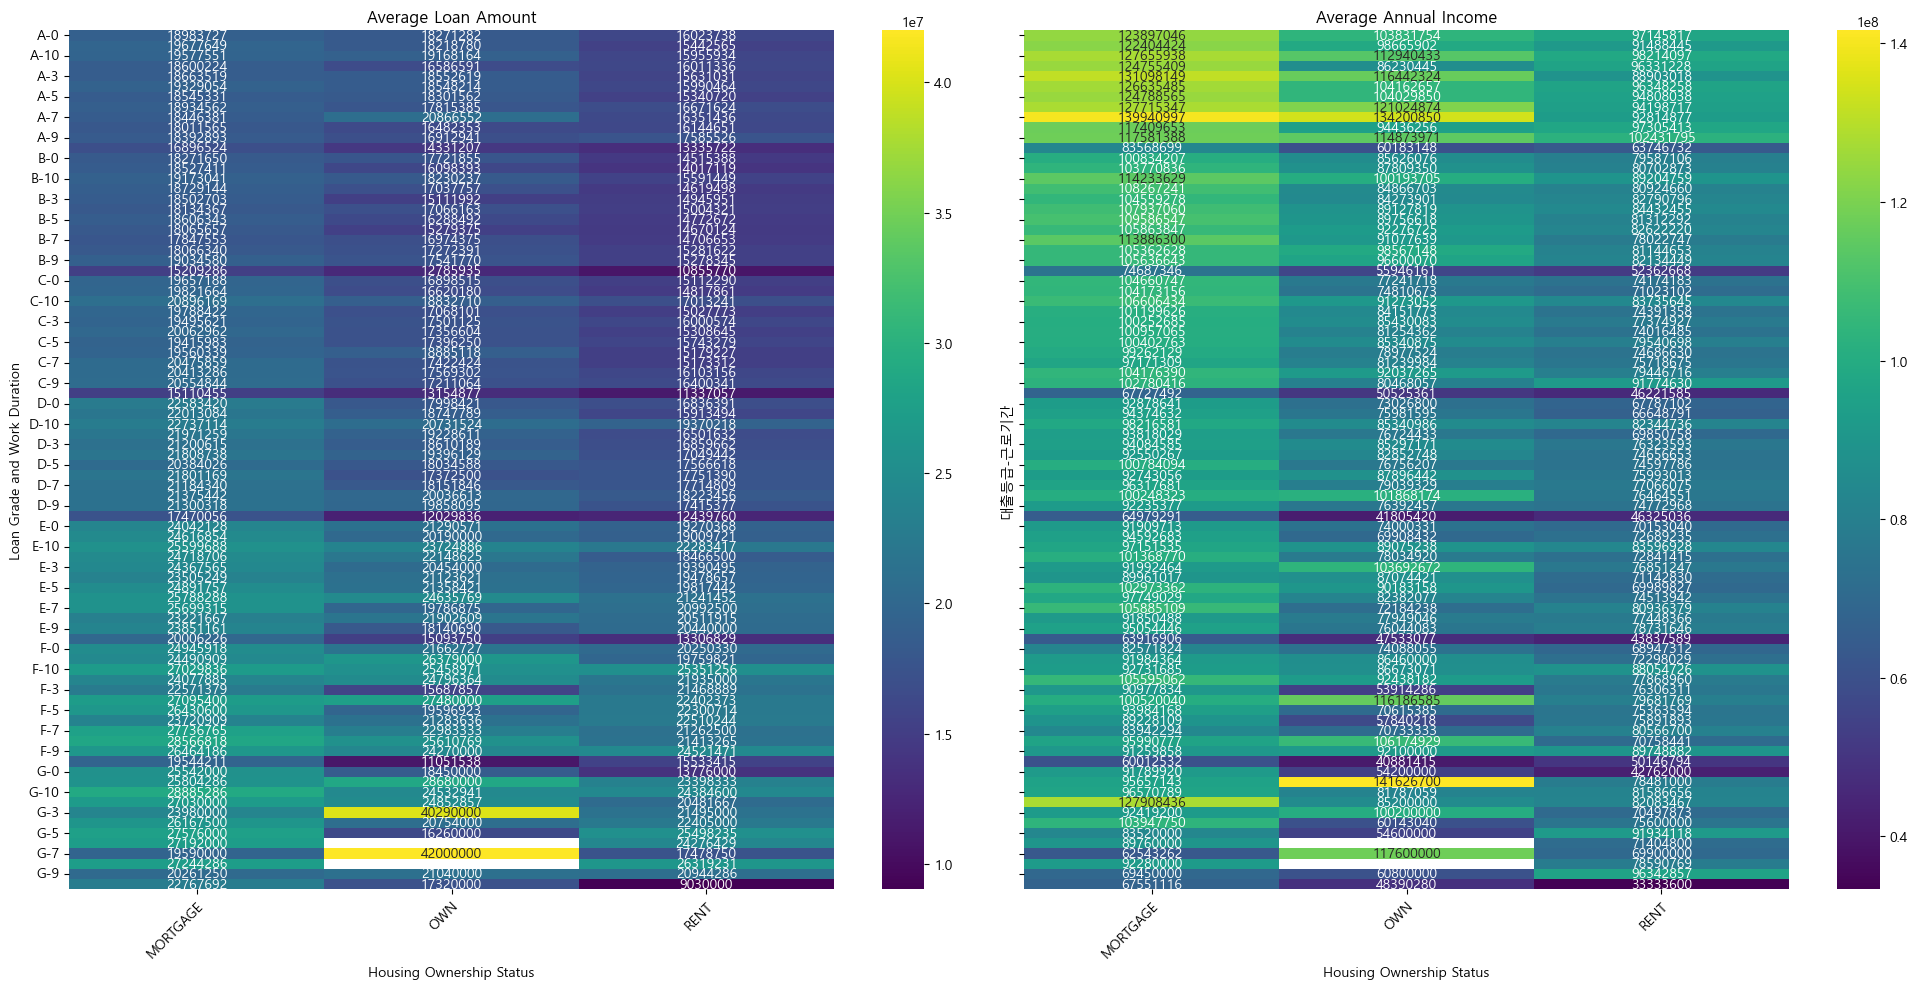

In [491]:
pivot_table = train_df.pivot_table(index=['대출등급', '근로기간'], columns='주택소유상태', values=['대출금액', '연간소득'], aggfunc='mean')

# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

# Heatmap for average loan amount
sns.heatmap(pivot_table['대출금액'], ax=axes[0], annot=True, fmt=".0f", cmap="viridis")
axes[0].set_title('Average Loan Amount')
axes[0].set_ylabel('Loan Grade and Work Duration')
axes[0].set_xlabel('Housing Ownership Status')

# Heatmap for average annual income
sns.heatmap(pivot_table['연간소득'], ax=axes[1], annot=True, fmt=".0f", cmap="viridis")
axes[1].set_title('Average Annual Income')
axes[1].set_xlabel('Housing Ownership Status')

# Rotate the x-axis labels for better readability
plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\DOHS\AppData\Local\Temp\ipykernel_6228\1727237716.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Sorted근로기간'] = train_df['근로기간'].apply(custom_sort_key)


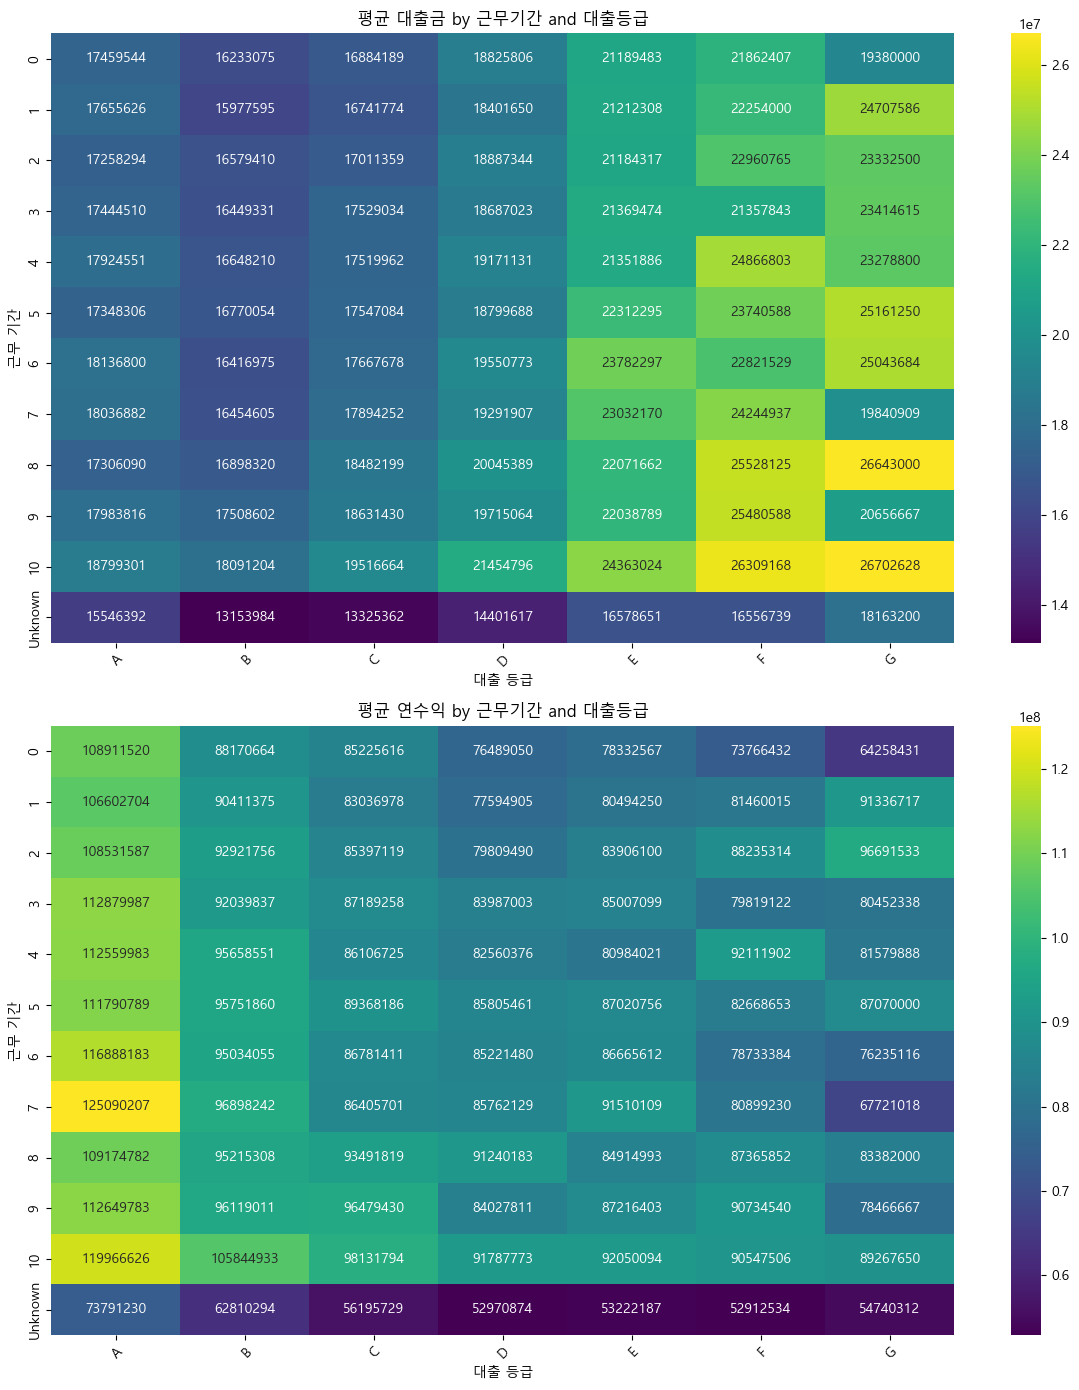

In [492]:
def custom_sort_key(x):
    if x == "Unknown":
        return np.inf 
    try:
        return int(x) 
    except ValueError:
        return np.inf 

train_df['Sorted근로기간'] = train_df['근로기간'].apply(custom_sort_key)
train_data_sorted = train_df.sort_values(by='Sorted근로기간')

loan_amount_pivot = train_data_sorted.pivot_table(index=['Sorted근로기간'], columns='대출등급', values='대출금액', aggfunc='mean')
annual_income_pivot = train_data_sorted.pivot_table(index=['Sorted근로기간'], columns='대출등급', values='연간소득', aggfunc='mean')

loan_amount_pivot.index = loan_amount_pivot.index.map(lambda x: "Unknown" if x == np.inf else str(int(x)))
annual_income_pivot.index = annual_income_pivot.index.map(lambda x: "Unknown" if x == np.inf else str(int(x)))

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 14))

sns.heatmap(loan_amount_pivot, annot=True, fmt=".0f", cmap="viridis", ax=axes[0])
axes[0].set_title('평균 대출금 by 근무기간 and 대출등급')
axes[0].set_xlabel('대출 등급')
axes[0].set_ylabel('근무 기간')

sns.heatmap(annual_income_pivot, annot=True, fmt=".0f", cmap="viridis", ax=axes[1])
axes[1].set_title('평균 연수익 by 근무기간 and 대출등급')
axes[1].set_xlabel('대출 등급')
axes[1].set_ylabel('근무 기간')

# Rotate the x-axis labels for better readability
plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

평균 대출금 by 근무기간 and 대출등급

확실히 대출 등급이 낮은 사람들은 평균적으로 더 많은 대출금을 받고있음-10+ 유독 높음, 년차가 높아질 수록 대출금이 많아짐,(7->8->9)에서 유독 변동이 심함
대출등급이 높을 수록 빌리는 돈이 낮아짐>경제적으로 안정적이여서 빌릴 돈도 적음> 기관에서는 부담없이 대출을 해줄 수 있다

연 수익 by 근무기간 and 대출등급

6년까지 점점 수익이 늘다가 갑자기 떨어짐 (이시기 무슨 이벤트가 있었는지 모르겠음)
평균 대출금 6->7에서 갑자기 확떨어짐 and 평균 연수익도 같이 확 떨어짐
경제 활동을 하면 대출도 많이 한다, 혹은 이벤트 결혼 준비 이직같은 이벤트 발생, 일시적인 공백 발생 >> 이때 소득이 없다 일자리가 다시생기면 이사비 결혼비 다양한 이유로 대출 다시 시작?

### 근무기간 간격간의 소득이 불안 할 수록 신용등급이 좋지 않다!!

In [493]:
pivot_table = train_df.pivot_table(index='대출등급', columns='근로기간', values='부채_대비_소득_비율')

# 근로기간의 정렬 순서를 지정
ordered_periods = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']  # unknown은 자료해석에 방해되서 시각화에서 잠시 제외
pivot_table = pivot_table[ordered_periods]
pivot_table

근로기간          1          2          3          4          5          6  \
대출등급                                                                     
A     16.201794  15.919243  16.470951  16.231631  16.262890  16.458738   
B     17.574660  17.722563  17.713588  17.713822  17.996045  17.938349   
C     19.433962  19.155138  19.215025  19.504604  19.676100  19.818941   
D     21.134800  20.918491  21.409319  20.417688  20.770679  21.856280   
E     20.735052  21.331727  21.433536  22.411977  21.789284  23.456182   
F     20.440273  20.220471  22.112288  20.478689  21.492101  23.352353   
G     21.129655  21.678889  21.977179  16.784400  19.725417  22.151579   

근로기간          7          8          9         10  
대출등급                                              
A     16.510727  16.678201  16.662367  16.903991  
B     18.630009  18.198906  18.396684  18.416517  
C     20.041704  20.230645  20.484080  20.290927  
D     21.769794  22.017694  22.212991  22.229767  
E     21.998931  21.818519  22.219516  22.597443  
F     20.650127  21.543984  21.740000  22.495455  
G     20.906818  20.595000  17.874444  21.069051

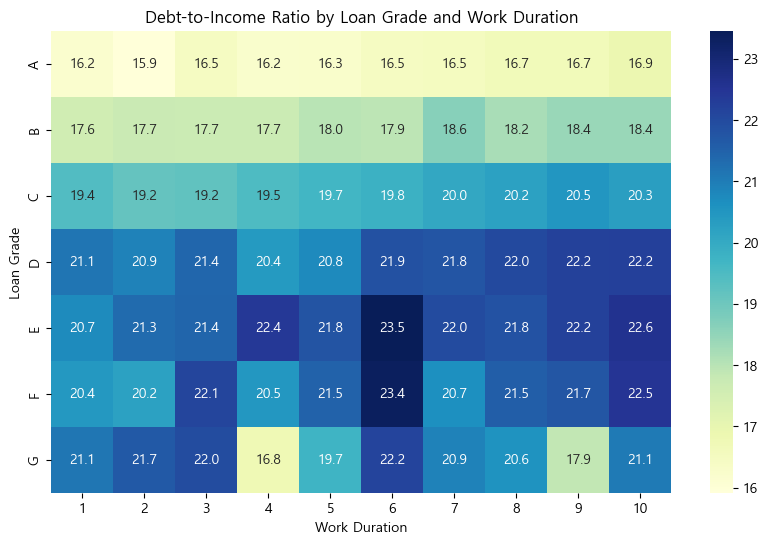

In [494]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title('Debt-to-Income Ratio by Loan Grade and Work Duration')
plt.xlabel('Work Duration')
plt.ylabel('Loan Grade')
plt.show()

등급이 높을 수록 근무기간에 따른 소득의 분산이 크지가 않다는 것을 확인 할 수 있다.
반대로 낮을 수록 근무기간 사이 분산차이가 큼을 알 수가 있었다(비례는 아님)
위의 과정이 맞는 사실임을 알수 있었다

-> 아래 그래프가 이를 더 뒷받침한다.

In [510]:
row

Empty DataFrame
Columns: [대출금액, 대출기간, 근로기간, 주택소유상태, 연간소득, 부채_대비_소득_비율, 총계좌수, 대출목적, 최근_2년간_연체_횟수, 총상환원금, 총상환이자, 총연체금액, 연체계좌수, 대출등급, LoanAmountQuartile, yearsincomeQuartile, Sorted근로기간]
Index: []

In [517]:
# 'Unknown' 값을 NaN으로 대체 후 삭제 -> Unknown이 시각화에 방해
df = train_df.replace({'근로기간': {'Unknown': np.nan}})
row = df.dropna()
row['근로기간'] = row['근로기간'].astype(int)

# 피벗 테이블을 생성합니다.
pivot_table = row.pivot_table(index='대출등급', columns='근로기간', values=['부채_대비_소득_비율', '연간소득'])
pivot_table = pivot_table.reindex(columns=sorted(pivot_table.columns))
pivot_table

C:\Users\DOHS\AppData\Local\Temp\ipykernel_6228\198805489.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['근로기간'] = row['근로기간'].astype(int)


부채_대비_소득_비율                                                         \
근로기간          0          1          2          3          4          5    
대출등급                                                                      
A      15.830706  16.201794  15.919243  16.470951  16.231631  16.262890   
B      17.597747  17.574660  17.722563  17.713588  17.713822  17.996045   
C      19.095276  19.433962  19.155138  19.215025  19.504604  19.676100   
D      20.898781  21.134800  20.918491  21.409319  20.417688  20.770679   
E      21.822052  20.735052  21.331727  21.433536  22.411977  21.789284   
F      21.602531  20.440273  20.220471  22.112288  20.478689  21.492101   
G      17.199615  21.129655  21.678889  21.977179  16.784400  19.725417   

                                                  ...          연간소득  \
근로기간         6          7          8          9   ...            1    
대출등급                                              ...                 
A     16.458738  16.510727  16.678201  16.662367  ...  1.066027e+08   
B     17.938349  18.630009  18.198906  18.396684  ...  9.041137e+07   
C     19.818941  20.041704  20.230645  20.484080  ...  8.303698e+07   
D     21.856280  21.769794  22.017694  22.212991  ...  7.759490e+07   
E     23.456182  21.998931  21.818519  22.219516  ...  8.049425e+07   
F     23.352353  20.650127  21.543984  21.740000  ...  8.146001e+07   
G     22.151579  20.906818  20.595000  17.874444  ...  9.133672e+07   

                                                                            \
근로기간            2             3             4             5             6    
대출등급                                                                         
A     1.085316e+08  1.128800e+08  1.125600e+08  1.117908e+08  1.168882e+08   
B     9.292176e+07  9.203984e+07  9.565855e+07  9.575186e+07  9.503406e+07   
C     8.539712e+07  8.718926e+07  8.610673e+07  8.936819e+07  8.678141e+07   
D     7.980949e+07  8.398700e+07  8.256038e+07  8.580546e+07  8.522148e+07   
E     8.390610e+07  8.500710e+07  8.098402e+07  8.702076e+07  8.666561e+07   
F     8.823531e+07  7.981912e+07  9.211190e+07  8.266865e+07  7.873338e+07   
G     9.669153e+07  8.045234e+07  8.157989e+07  8.707000e+07  7.623512e+07   

                                                              
근로기간            7             8             9             10  
대출등급                                                          
A     1.250902e+08  1.091748e+08  1.126498e+08  1.199666e+08  
B     9.689824e+07  9.521531e+07  9.611901e+07  1.058449e+08  
C     8.640570e+07  9.349182e+07  9.647943e+07  9.813179e+07  
D     8.576213e+07  9.124018e+07  8.402781e+07  9.178777e+07  
E     9.151011e+07  8.491499e+07  8.721640e+07  9.205009e+07  
F     8.089923e+07  8.736585e+07  9.073454e+07  9.054751e+07  
G     6.772102e+07  8.338200e+07  7.846667e+07  8.926765e+07  

[7 rows x 22 columns]

Text(0, 0.5, 'Annual Income')

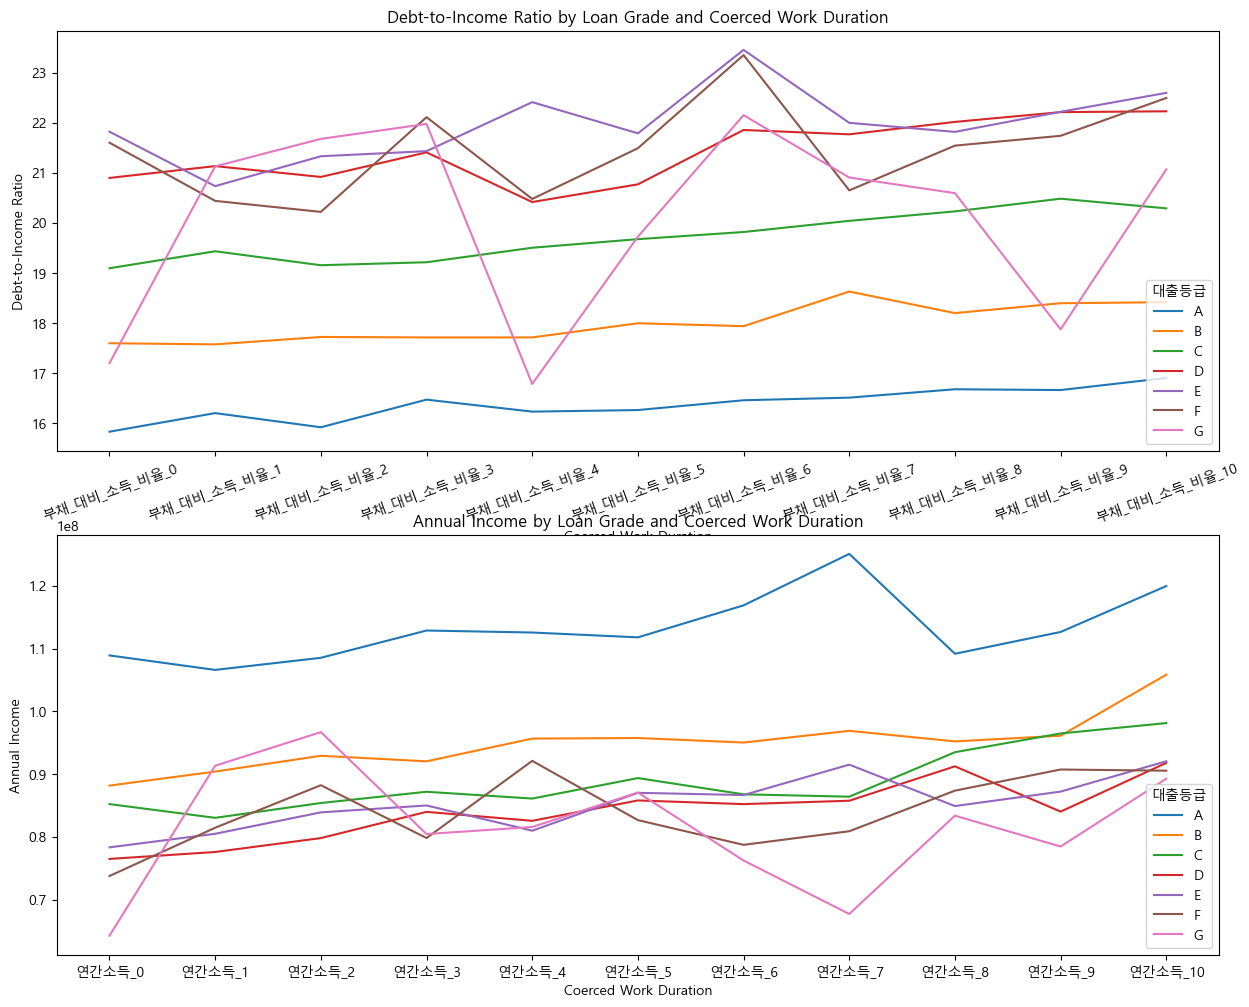

In [518]:
# Convert the multi-level column names to a single level by joining with an underscore
pivot_table.columns = ['_'.join(map(str, col)).strip() for col in pivot_table.columns.values]

# Melt the flattened pivot table for plotting
melted_pivot = pivot_table.reset_index().melt(id_vars='대출등급')

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot for Debt-to-Income Ratio
dti_data = melted_pivot[melted_pivot['variable'].str.contains('부채_대비_소득_비율')]
sns.lineplot(data=dti_data, x='variable', y='value', hue='대출등급', ax=axes[0])
axes[0].set_title('Debt-to-Income Ratio by Loan Grade and Coerced Work Duration')
axes[0].set_xlabel('Coerced Work Duration')
axes[0].set_ylabel('Debt-to-Income Ratio')
axes[0].tick_params(axis='x', rotation=20)  # x축 레이블 회전
# 대출등급이 낮아질수록 부채대비소득비율이 점점 커지고 근무기간에 따른 분산이 커짐

# Plot for Annual Income
income_data = melted_pivot[melted_pivot['variable'].str.contains('연간소득')]
sns.lineplot(data=income_data, x='variable', y='value', hue='대출등급', ax=axes[1])
axes[1].set_title('Annual Income by Loan Grade and Coerced Work Duration')
axes[1].set_xlabel('Coerced Work Duration')
axes[1].set_ylabel('Annual Income')

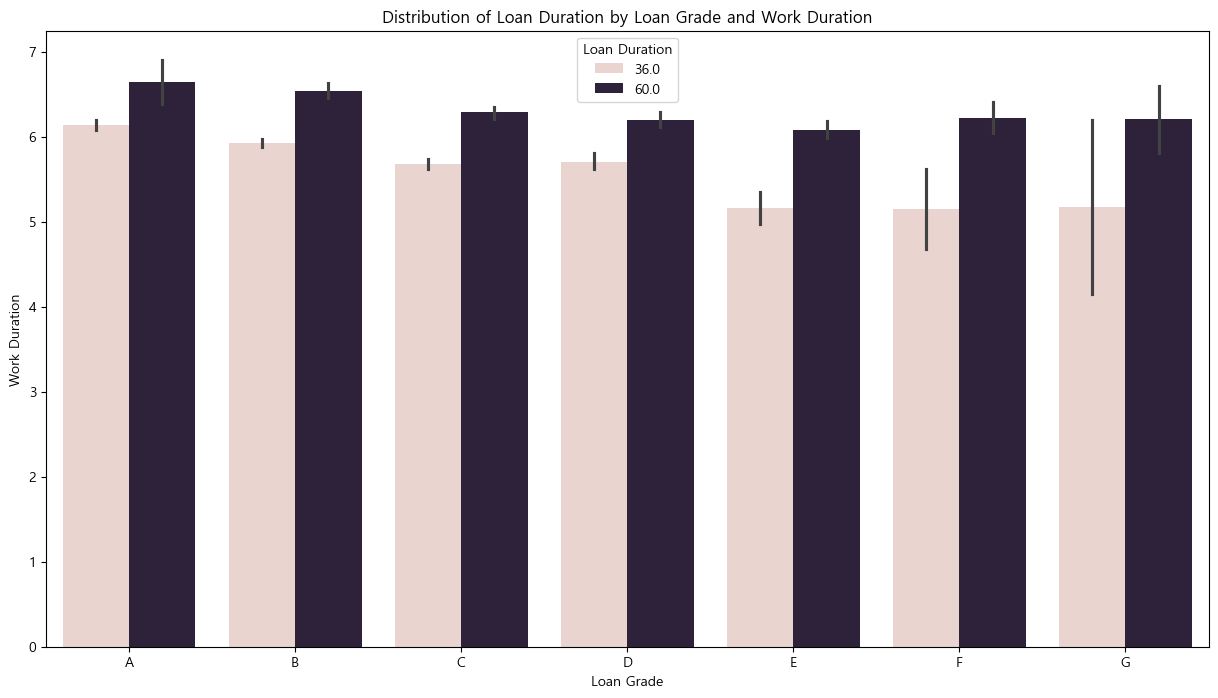

In [520]:
plt.figure(figsize=(15, 8))
sns.barplot(x='대출등급', y='근로기간', hue='대출기간', data=row)

plt.title('Distribution of Loan Duration by Loan Grade and Work Duration')
plt.xlabel('Loan Grade')
plt.ylabel('Work Duration')
plt.legend(title='Loan Duration')
plt.show()
# 근로기간이 길수록 대출기간이 길다
# 대출등급이 낮아질수록 근로기간의 분산이 커짐

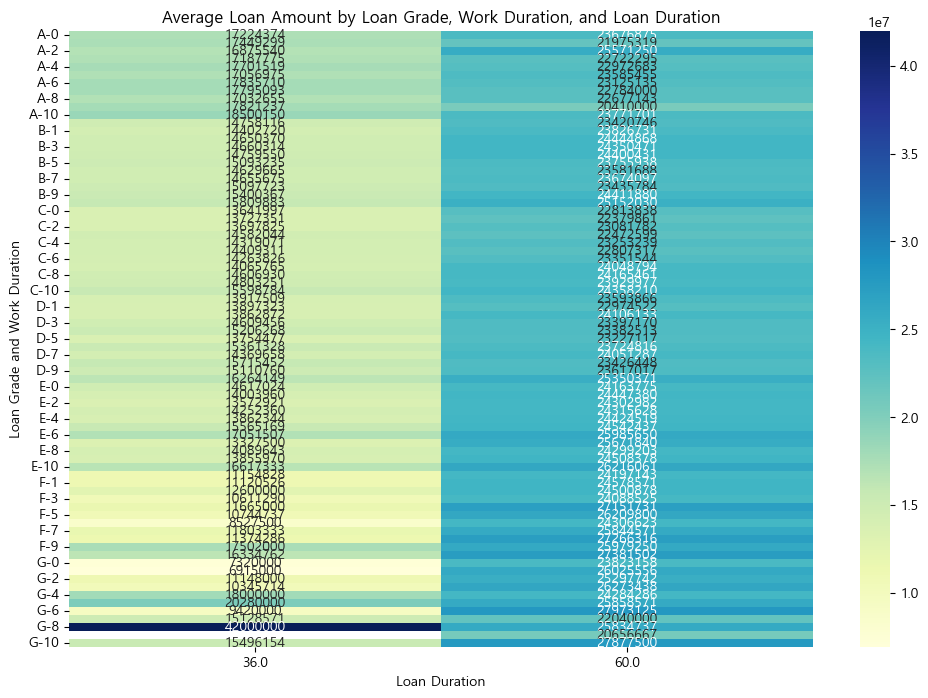

In [525]:
pivot_table = row.pivot_table(index=['대출등급', '근로기간'], columns='대출기간', values='대출금액')

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title('Average Loan Amount by Loan Grade, Work Duration, and Loan Duration')
plt.xlabel('Loan Duration')
plt.ylabel('Loan Grade and Work Duration')
plt.show()

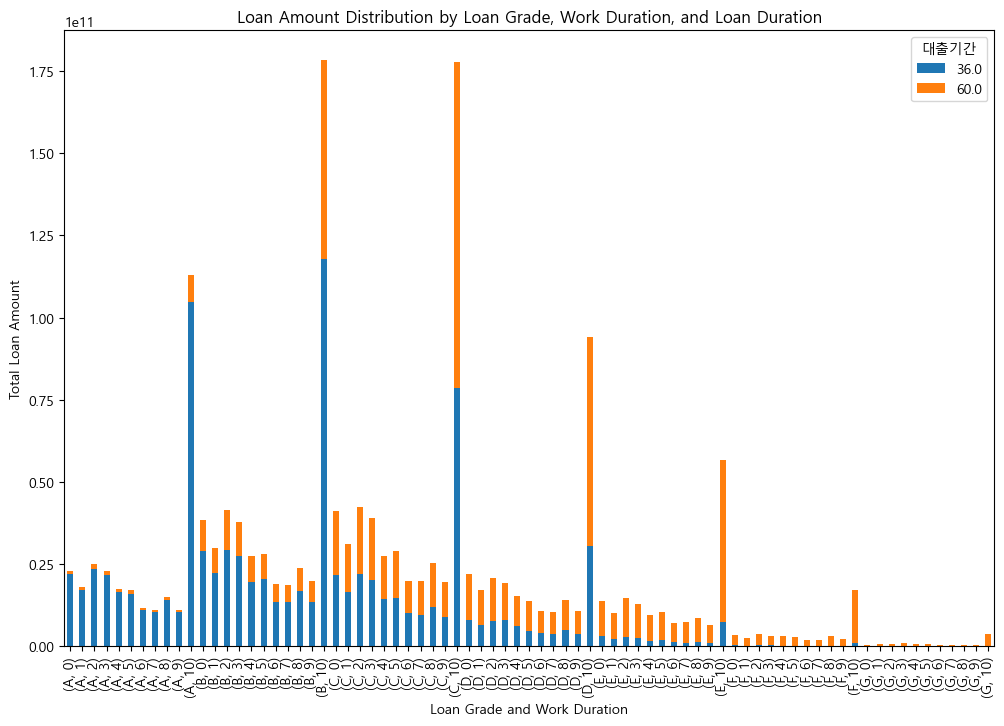

In [527]:
pivot_table = row.pivot_table(index=['대출등급', '근로기간'], columns='대출기간', values='대출금액', aggfunc='sum')

# Plotting a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Loan Amount Distribution by Loan Grade, Work Duration, and Loan Duration')
plt.xlabel('Loan Grade and Work Duration')
plt.ylabel('Total Loan Amount')
plt.show()

C:\Users\DOHS\AppData\Local\Temp\ipykernel_6228\2895403407.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=row, x='대출등급', y='연체계좌수', hue='근로기간', ci=None)


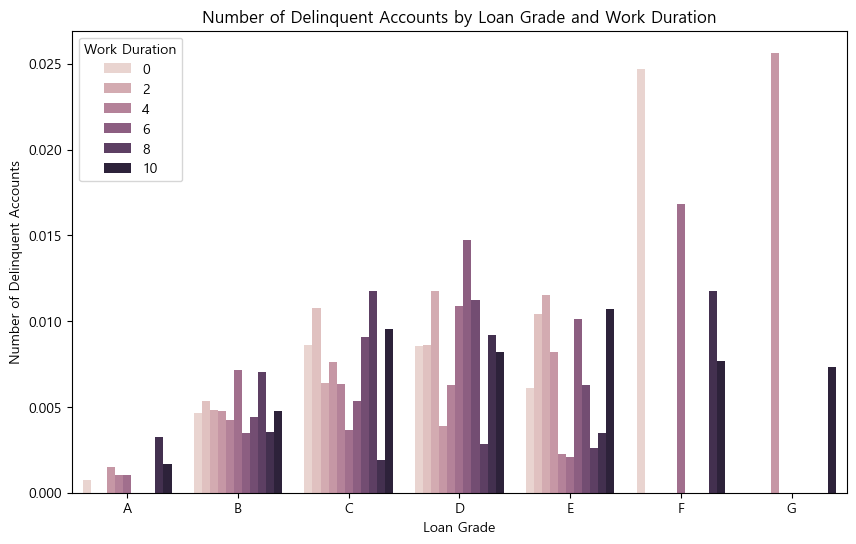

In [528]:
plt.figure(figsize=(10, 6))
sns.barplot(data=row, x='대출등급', y='연체계좌수', hue='근로기간', ci=None)
plt.title('Number of Delinquent Accounts by Loan Grade and Work Duration')
plt.xlabel('Loan Grade')
plt.ylabel('Number of Delinquent Accounts')
plt.legend(title='Work Duration')
plt.show()

신용등급이 낮을수록 근로기간종류에 따른 연체된 계좌수가 적음을 알수가 있음

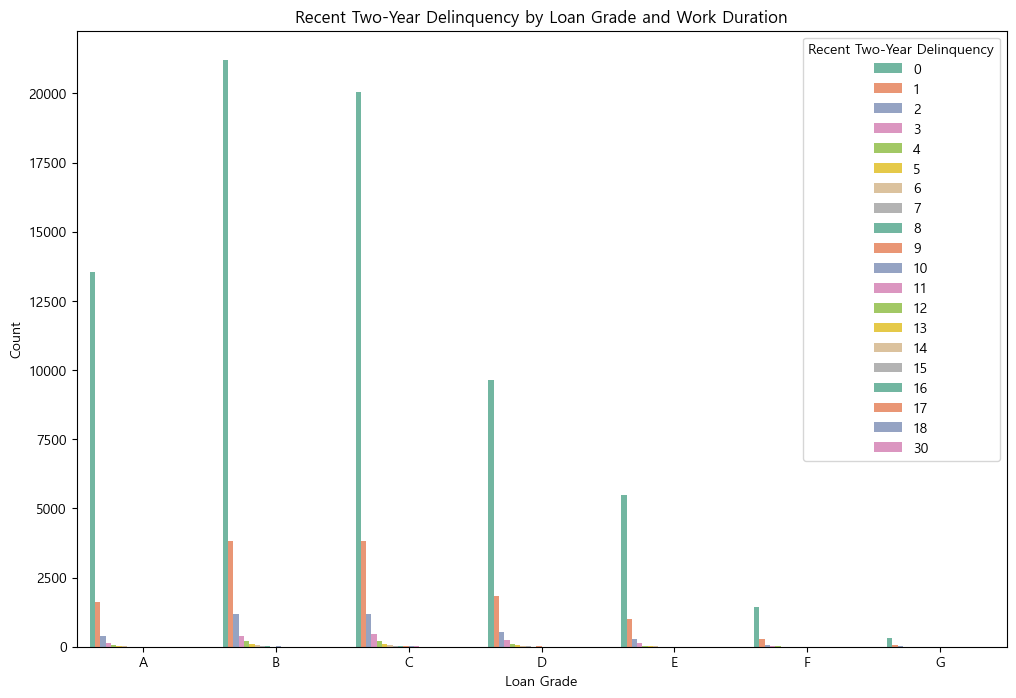

In [533]:
plt.figure(figsize=(12, 8))
sns.countplot(data=row, x='대출등급', hue='최근_2년간_연체_횟수', palette="Set2")

plt.title('Recent Two-Year Delinquency by Loan Grade and Work Duration')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.legend(title='Recent Two-Year Delinquency', loc='upper right')
plt.show()

연체 횟수가 적으면 적을수록 대출등급이 낮아보이나, 이는 데이터 분포의 차이(대출등급이 낮은 데이터가 높은 데이터에 비해 매우 적음)

In [537]:
pivot_table = row.pivot_table(index='대출등급', columns='최근_2년간_연체_횟수', values='대출금액', aggfunc='mean')
pivot_table

최근_2년간_연체_횟수            0             1             2             3   \
대출등급                                                                   
A             1.810392e+07  1.795340e+07  1.792689e+07  1.632425e+07   
B             1.726970e+07  1.680395e+07  1.657247e+07  1.570564e+07   
C             1.818409e+07  1.830576e+07  1.832450e+07  1.736263e+07   
D             1.981965e+07  2.043204e+07  1.982613e+07  2.029427e+07   
E             2.247194e+07  2.313558e+07  2.404567e+07  2.363487e+07   
F             2.410063e+07  2.501258e+07  2.647192e+07  2.474912e+07   
G             2.393845e+07  2.461250e+07  2.556130e+07  2.631000e+07   

최근_2년간_연체_횟수            4             5             6             7   \
대출등급                                                                   
A             1.583294e+07  1.456900e+07  1.346769e+07  1.656000e+07   
B             1.495228e+07  1.514974e+07  1.442632e+07  1.476706e+07   
C             1.809205e+07  1.638235e+07  1.692780e+07  1.720250e+07   
D             1.716695e+07  2.095080e+07  1.880419e+07  2.184462e+07   
E             1.893068e+07  2.182320e+07  2.483786e+07  2.461500e+07   
F             2.677833e+07  2.640000e+07  2.232000e+07  3.354000e+07   
G             3.730500e+07           NaN  3.810000e+07  3.364500e+07   

최근_2년간_연체_횟수            8             9           10          11          12  \
대출등급                                                                           
A             1.275000e+07  1.740000e+07  14712000.0         NaN         NaN   
B             1.490308e+07  1.669500e+07  10920000.0  12405000.0  21850000.0   
C             1.589286e+07  1.356545e+07  17500000.0  12880000.0  16080000.0   
D             2.301375e+07  1.333091e+07  10800000.0  13050000.0  18600000.0   
E             2.136000e+07  1.824000e+07  25200000.0         NaN  25200000.0   
F             2.400000e+07  2.456000e+07  13440000.0         NaN         NaN   
G                      NaN           NaN         NaN         NaN         NaN   

최근_2년간_연체_횟수          13          14          15          16          17  \
대출등급                                                                       
A             12000000.0   8400000.0  16800000.0         NaN         NaN   
B             14497500.0   7200000.0         NaN  18600000.0         NaN   
C              5955000.0   7600000.0         NaN  22755000.0         NaN   
D                    NaN  26400000.0         NaN  11700000.0         NaN   
E                    NaN         NaN  30000000.0         NaN         NaN   
F                    NaN         NaN         NaN         NaN         NaN   
G                    NaN         NaN         NaN         NaN  20160000.0   

최근_2년간_연체_횟수         18          30  
대출등급                                 
A             9600000.0         NaN  
B                   NaN         NaN  
C                   NaN  18000000.0  
D                   NaN         NaN  
E             6840000.0         NaN  
F                   NaN         NaN  
G                   NaN         NaN

In [538]:
pivot_table.T.sort_values(by="A") # 아래로 갈수록 대출금액이 많아짐(확인 필요)

대출등급                     A             B             C             D  \
최근_2년간_연체_횟수                                                           
14            8.400000e+06  7.200000e+06  7.600000e+06  2.640000e+07   
18            9.600000e+06           NaN           NaN           NaN   
13            1.200000e+07  1.449750e+07  5.955000e+06           NaN   
8             1.275000e+07  1.490308e+07  1.589286e+07  2.301375e+07   
6             1.346769e+07  1.442632e+07  1.692780e+07  1.880419e+07   
5             1.456900e+07  1.514974e+07  1.638235e+07  2.095080e+07   
10            1.471200e+07  1.092000e+07  1.750000e+07  1.080000e+07   
4             1.583294e+07  1.495228e+07  1.809205e+07  1.716695e+07   
3             1.632425e+07  1.570564e+07  1.736263e+07  2.029427e+07   
7             1.656000e+07  1.476706e+07  1.720250e+07  2.184462e+07   
15            1.680000e+07           NaN           NaN           NaN   
9             1.740000e+07  1.669500e+07  1.356545e+07  1.333091e+07   
2             1.792689e+07  1.657247e+07  1.832450e+07  1.982613e+07   
1             1.795340e+07  1.680395e+07  1.830576e+07  2.043204e+07   
0             1.810392e+07  1.726970e+07  1.818409e+07  1.981965e+07   
11                     NaN  1.240500e+07  1.288000e+07  1.305000e+07   
12                     NaN  2.185000e+07  1.608000e+07  1.860000e+07   
16                     NaN  1.860000e+07  2.275500e+07  1.170000e+07   
17                     NaN           NaN           NaN           NaN   
30                     NaN           NaN  1.800000e+07           NaN   

대출등급                     E             F             G  
최근_2년간_연체_횟수                                            
14                     NaN           NaN           NaN  
18            6.840000e+06           NaN           NaN  
13                     NaN           NaN           NaN  
8             2.136000e+07  2.400000e+07           NaN  
6             2.483786e+07  2.232000e+07  3.810000e+07  
5             2.182320e+07  2.640000e+07           NaN  
10            2.520000e+07  1.344000e+07           NaN  
4             1.893068e+07  2.677833e+07  3.730500e+07  
3             2.363487e+07  2.474912e+07  2.631000e+07  
7             2.461500e+07  3.354000e+07  3.364500e+07  
15            3.000000e+07           NaN           NaN  
9             1.824000e+07  2.456000e+07           NaN  
2             2.404567e+07  2.647192e+07  2.556130e+07  
1             2.313558e+07  2.501258e+07  2.461250e+07  
0             2.247194e+07  2.410063e+07  2.393845e+07  
11                     NaN           NaN           NaN  
12            2.520000e+07           NaN           NaN  
16                     NaN           NaN           NaN  
17                     NaN           NaN  2.016000e+07  
30                     NaN           NaN           NaN

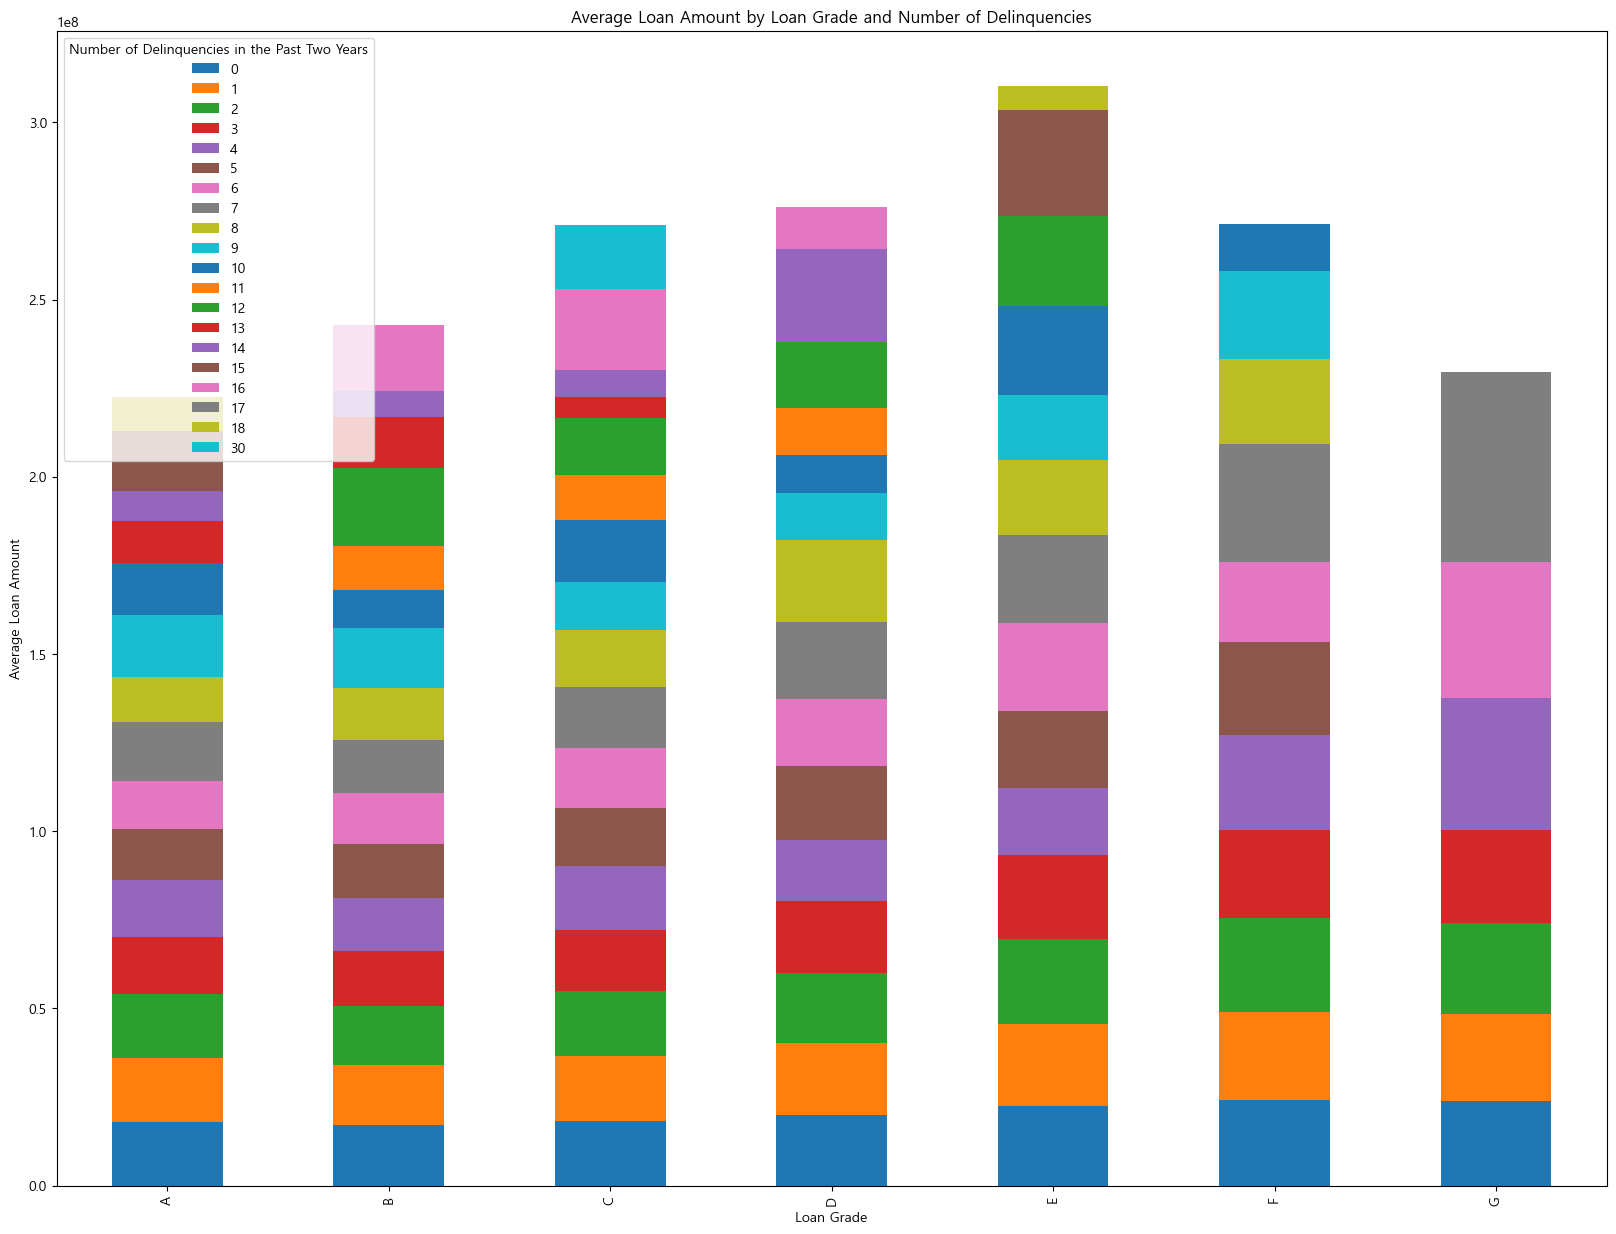

In [539]:
pivot_table = row.pivot_table(index='대출등급', columns='최근_2년간_연체_횟수', values='대출금액', aggfunc='mean')

# Plotting the pivot table
pivot_table.plot(kind='bar', stacked=True, figsize=(20, 15))
plt.title('Average Loan Amount by Loan Grade and Number of Delinquencies')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Number of Delinquencies in the Past Two Years')
plt.show()

# 2


In [540]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from catboost import CatBoostClassifier, Pool

categorical data EDA

In [545]:
def credits_level_counts(col):

    unique_list = list(row[col].unique())
    
    for unique in unique_list:
    
        cond_unique = (row[col]==unique)
        print(unique)
        print(row.loc[cond_unique]['대출등급'].value_counts())
        print()

In [546]:
hue_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [547]:
list_cat = ['대출기간', '근로기간', '주택소유상태', '대출목적']

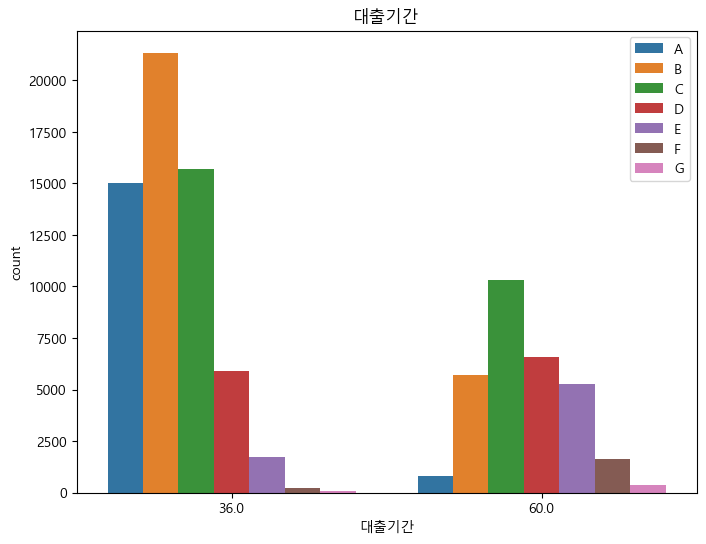


36.0
대출등급
B    21356
C    15680
A    15044
D     5888
E     1722
F      237
G       52
Name: count, dtype: int64

60.0
대출등급
C    10314
D     6594
B     5719
E     5254
F     1625
A      794
G      343
Name: count, dtype: int64



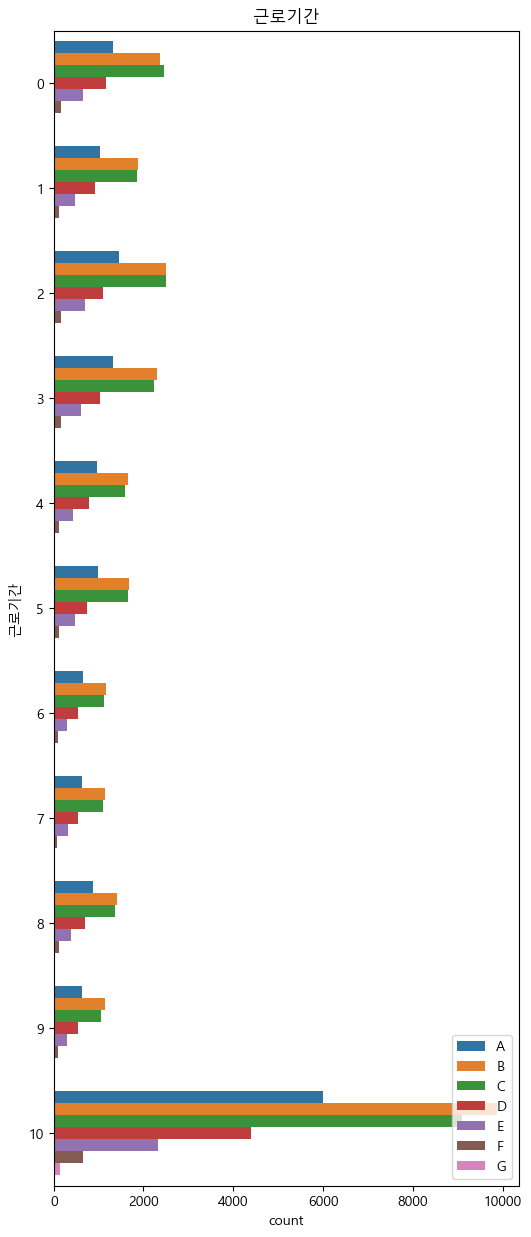


6
대출등급
B    1157
C    1124
A     650
D     543
E     296
F      85
G      19
Name: count, dtype: int64

10
대출등급
B    9865
C    9104
A    6009
D    4385
E    2331
F     649
G     137
Name: count, dtype: int64

5
대출등급
B    1679
C    1646
A     986
D     736
E     475
F     119
G      24
Name: count, dtype: int64

8
대출등급
B    1417
C    1364
A     867
D     707
E     385
F     128
G      20
Name: count, dtype: int64

9
대출등급
B    1137
C    1049
A     621
D     545
E     289
F      85
G      18
Name: count, dtype: int64

2
대출등급
C    2495
B    2493
A    1454
D    1107
E     695
F     170
G      36
Name: count, dtype: int64

1
대출등급
B    1867
C    1860
A    1031
D     927
E     481
F     110
G      29
Name: count, dtype: int64

3
대출등급
B    2302
C    2225
A    1315
D    1028
E     608
F     153
G      39
Name: count, dtype: int64

7
대출등급
B    1138
C    1103
A     619
D     535
E     318
F      79
G      22
Name: count, dtype: int64

4
대출등급
B    1659
C    1577
A     969
D     796
E     440
F    

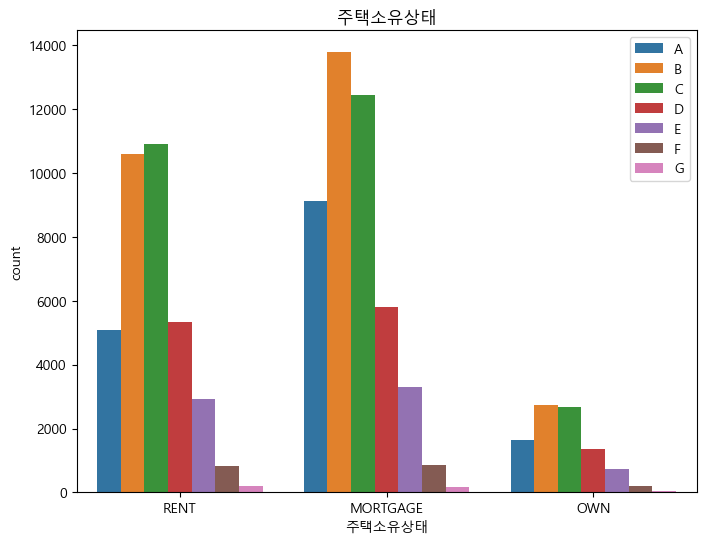


RENT
대출등급
C    10897
B    10583
D     5319
A     5081
E     2933
F      814
G      189
Name: count, dtype: int64

MORTGAGE
대출등급
B    13762
C    12424
A     9125
D     5808
E     3293
F      845
G      159
Name: count, dtype: int64

OWN
대출등급
B    2730
C    2673
A    1632
D    1355
E     750
F     203
G      47
Name: count, dtype: int64



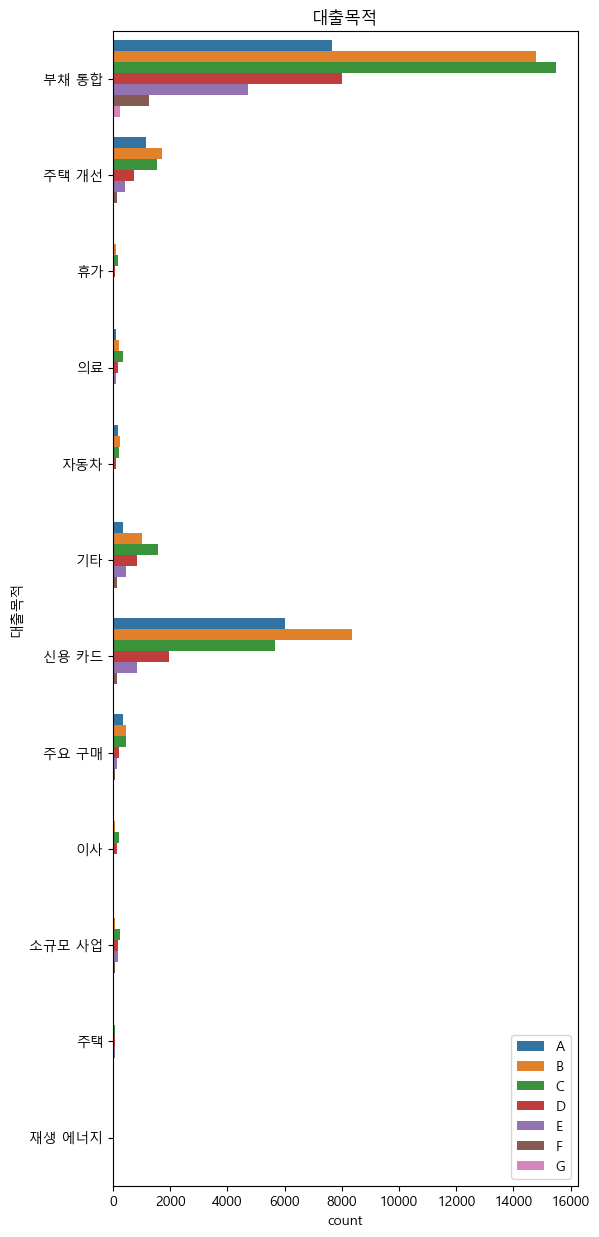


부채 통합
대출등급
C    15489
B    14803
D     8013
A     7645
E     4731
F     1240
G      250
Name: count, dtype: int64

주택 개선
대출등급
B    1699
C    1542
A    1140
D     744
E     403
F     143
G      25
Name: count, dtype: int64

휴가
대출등급
C    177
B    110
D     73
A     37
E     23
F      4
G      1
Name: count, dtype: int64

의료
대출등급
C    338
B    210
D    177
A     98
E     85
F     24
G      5
Name: count, dtype: int64

자동차
대출등급
B    239
C    201
A    168
D     87
E     45
F     15
G      4
Name: count, dtype: int64

기타
대출등급
C    1573
B    1001
D     838
E     451
A     333
F     141
G      42
Name: count, dtype: int64

신용 카드
대출등급
B    8371
A    6029
C    5676
D    1940
E     825
F     130
G      16
Name: count, dtype: int64

주요 구매
대출등급
C    464
B    448
A    349
D    219
E    143
F     52
G      7
Name: count, dtype: int64

이사
대출등급
C    193
D    119
B     83
E     46
F     18
A     13
G      5
Name: count, dtype: int64

소규모 사업
대출등급
C    240
D    186
E    155
B     73
F     63
G     29
A  

In [549]:
for col in list_cat:

    if col in ['근로기간', '대출목적']:

       plt.figure(figsize=(6,15))
       sns.countplot(data=row,y=col, hue='대출등급', hue_order=hue_order)
       plt.title(col)
       plt.legend(loc='lower right')
       plt.show()
       print()
       credits_level_counts(col=col)

    else:

        plt.figure(figsize=(8,6))
        sns.countplot(data=row, x=col, hue='대출등급', hue_order=hue_order)
        plt.title(col)
        plt.legend(loc='upper right')
        plt.show()
        print()
        credits_level_counts(col=col)

Numerical data

In [100]:
list_num = ['연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수',
            '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

In [101]:
def num_statistic(data, col):
    statistic_df = pd.DataFrame()

    for level in hue_order:
        level_df = data.loc[(data['대출등급']==level)][[col]].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
        level_df.index = [level]
        
        statistic_df = pd.concat([statistic_df, level_df], axis=0)

    display(statistic_df)
    print()

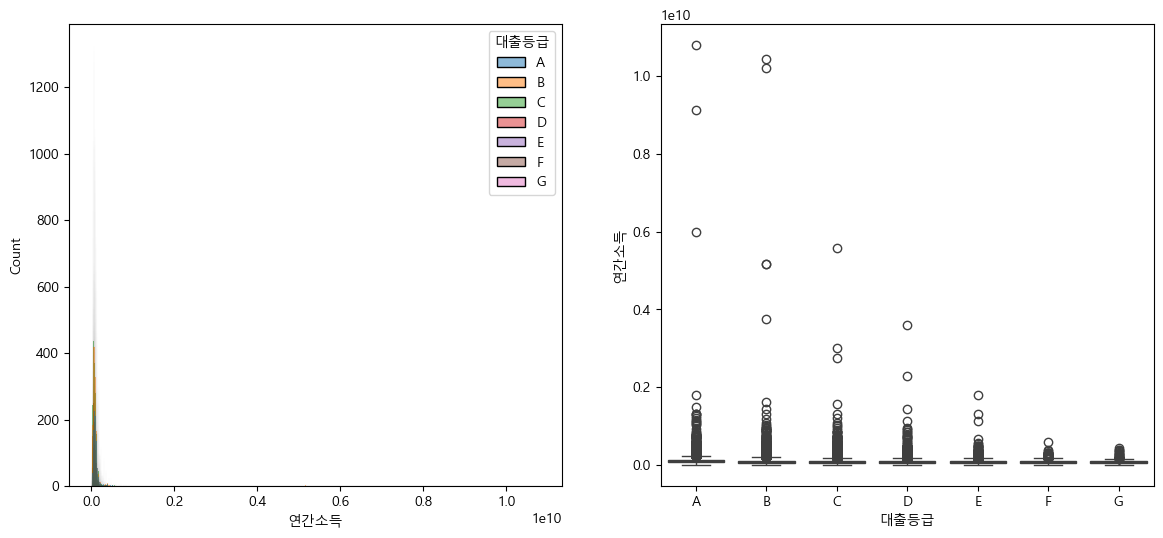

mean           std         min         25%         50%  \
A  1.124911e+08  1.396115e+08  11424000.0  67200000.0  96000000.0   
B  9.570640e+07  1.160385e+08   9600000.0  58386000.0  81600000.0   
C  8.903804e+07  7.227919e+07         0.0  54000000.0  75600000.0   
D  8.359673e+07  6.622318e+07   2124000.0  51454800.0  72000000.0   
E  8.492864e+07  5.582495e+07   1440000.0  54000000.0  73200000.0   
F  8.434506e+07  4.500624e+07  10627200.0  54000000.0  75430800.0   
G  8.258034e+07  5.407082e+07  10555200.0  50400000.0  70800000.0   

           75%           max  
A  132000000.0  1.080000e+10  
B  114000000.0  1.044000e+10  
C  108000000.0  5.576640e+09  
D  100800000.0  3.600000e+09  
E  102000000.0  1.800000e+09  
F  102000000.0  6.000000e+08  
G   96000000.0  4.344000e+08

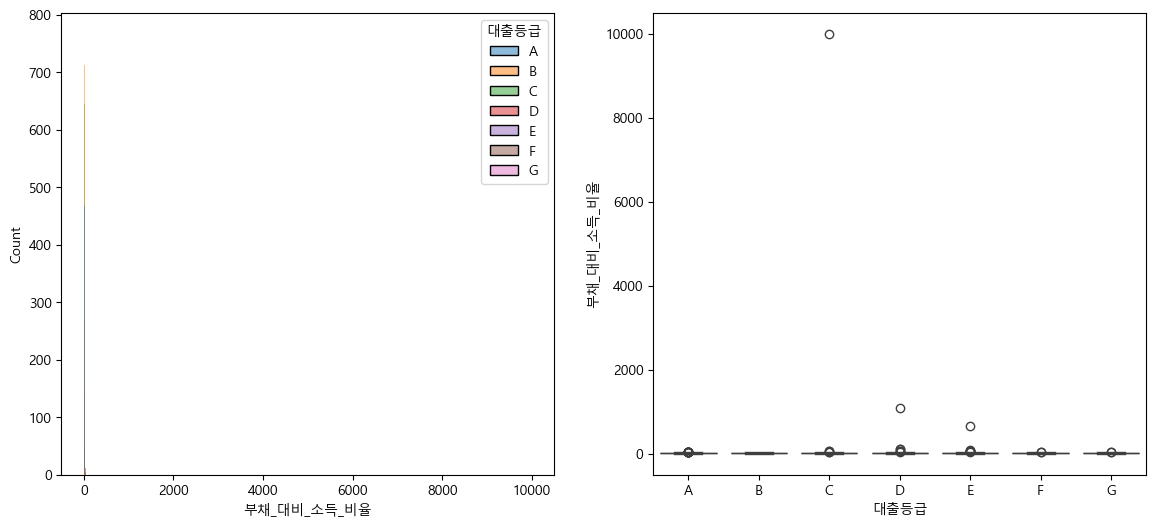

mean        std   min      25%     50%      75%      max
A  16.547850   7.558913  0.00  10.8200  16.130  21.8700    39.80
B  18.129529   8.191684  0.00  11.9300  17.600  23.9800    41.69
C  20.270095  60.681872  0.00  13.3000  19.510  26.3050  9999.00
D  21.808465  13.166067  0.00  14.6900  21.610  29.1575  1092.52
E  22.248466  11.977395  0.16  15.3500  21.925  29.2875   672.52
F  21.853710   8.913153  0.66  15.3925  22.125  28.3375    54.36
G  20.691952   8.718104  0.82  14.3525  21.095  26.5350    47.61

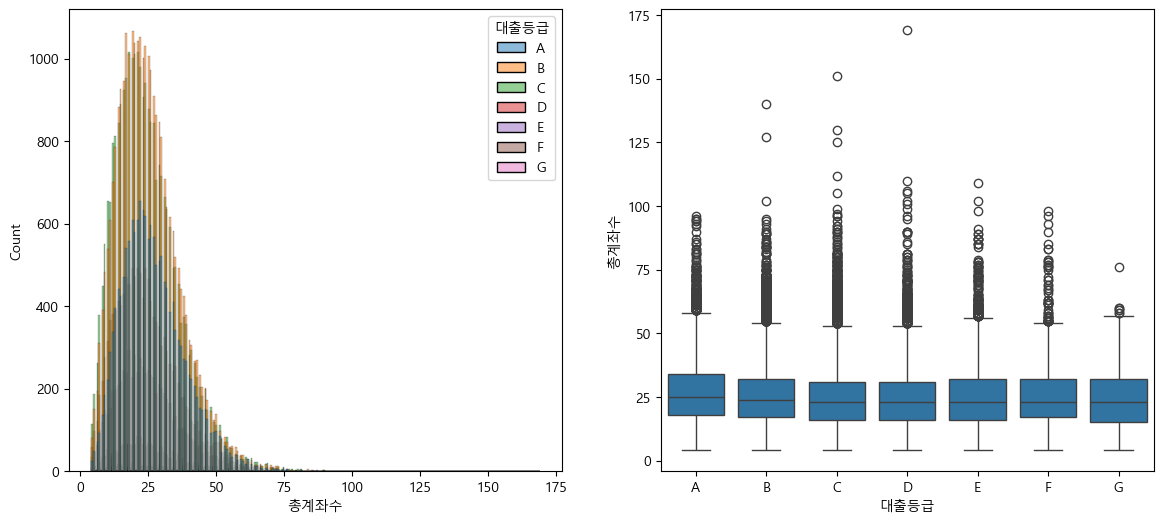

mean        std  min   25%   50%   75%    max
A  26.910684  11.788615  4.0  18.0  25.0  34.0   96.0
B  25.223375  11.765557  4.0  17.0  24.0  32.0  140.0
C  24.695073  12.195646  4.0  16.0  23.0  31.0  151.0
D  24.705107  12.357153  4.0  16.0  23.0  31.0  169.0
E  25.320642  12.522195  4.0  16.0  23.0  32.0  109.0
F  25.543501  12.950036  4.0  17.0  23.0  32.0   98.0
G  24.550000  12.482346  4.0  15.0  23.0  32.0   76.0

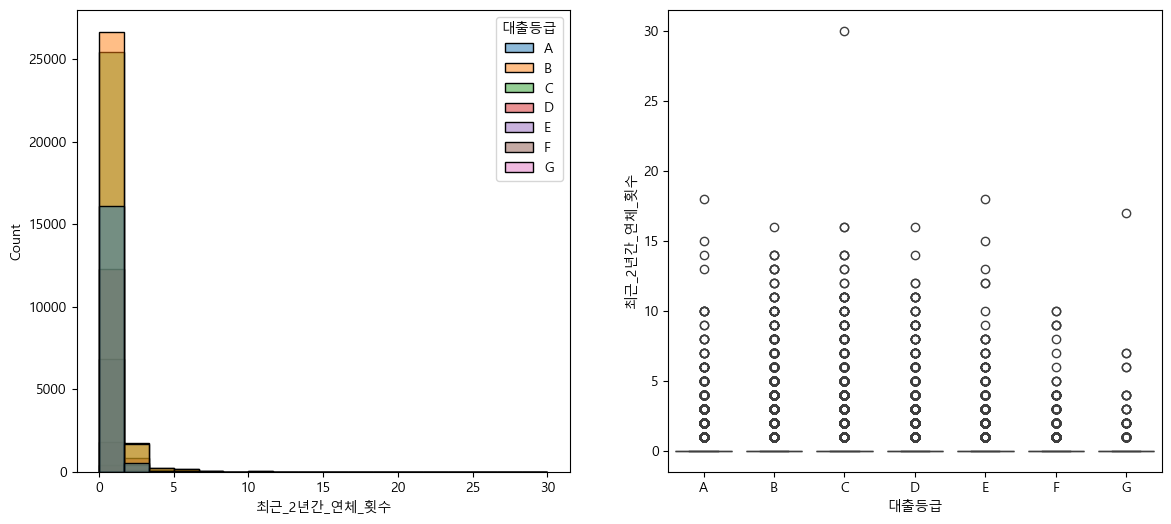

mean       std  min  25%  50%  75%   max
A  0.218698  0.704163  0.0  0.0  0.0  0.0  18.0
B  0.365409  0.947582  0.0  0.0  0.0  0.0  16.0
C  0.380299  0.966606  0.0  0.0  0.0  0.0  30.0
D  0.384379  0.970777  0.0  0.0  0.0  0.0  16.0
E  0.349334  0.914513  0.0  0.0  0.0  0.0  18.0
F  0.361822  0.914466  0.0  0.0  0.0  0.0  10.0
G  0.416667  1.239835  0.0  0.0  0.0  0.0  17.0

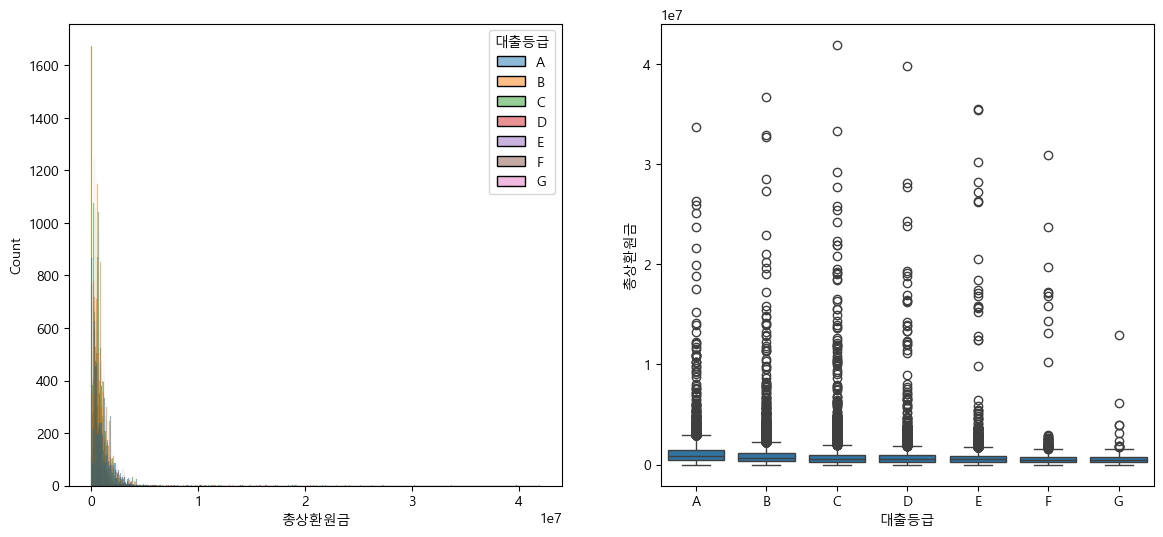

mean           std  min       25%       50%        75%         max
A  1.066966e+06  1.076776e+06  0.0  444804.0  830280.0  1441248.0  33683988.0
B  8.340144e+05  9.403085e+05  0.0  318336.0  606564.0  1101888.0  36721164.0
C  7.521078e+05  9.753910e+05  0.0  278616.0  552132.0   963672.0  41955936.0
D  7.297173e+05  1.018910e+06  0.0  267948.0  528600.0   908784.0  39793896.0
E  7.074507e+05  1.238723e+06  0.0  288672.0  523908.0   872802.0  35550000.0
F  6.673177e+05  1.368616e+06  0.0  267030.0  490224.0   794940.0  30911292.0
G  5.870190e+05  8.149610e+05  0.0  229296.0  442188.0   764745.0  12937416.0

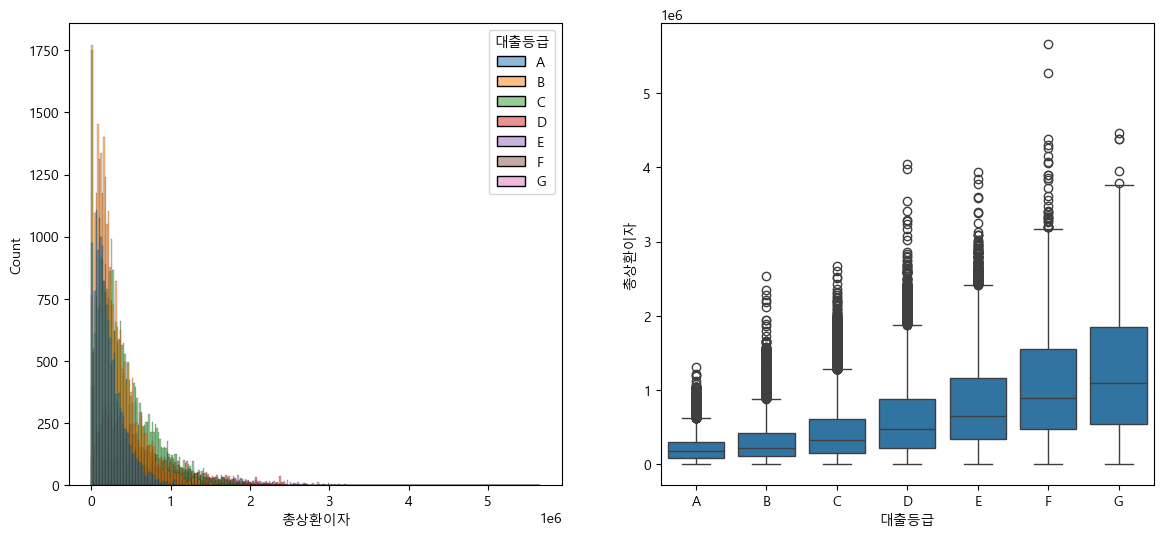

mean            std  min       25%        50%        75%        max
A  2.240085e+05  183508.609726  0.0   91401.0   175632.0   306678.0  1315908.0
B  3.033410e+05  268912.292532  0.0  110652.0   222228.0   421008.0  2538084.0
C  4.306745e+05  377468.910481  0.0  154560.0   323028.0   607092.0  2671956.0
D  6.117896e+05  520056.028372  0.0  220875.0   474684.0   884532.0  4048740.0
E  8.146975e+05  627671.231203  0.0  338886.0   653004.0  1168896.0  3942252.0
F  1.095274e+06  819704.001437  0.0  470883.0   900930.0  1548396.0  5653416.0
G  1.284655e+06  952955.115509  0.0  549405.0  1089972.0  1844562.0  4464612.0

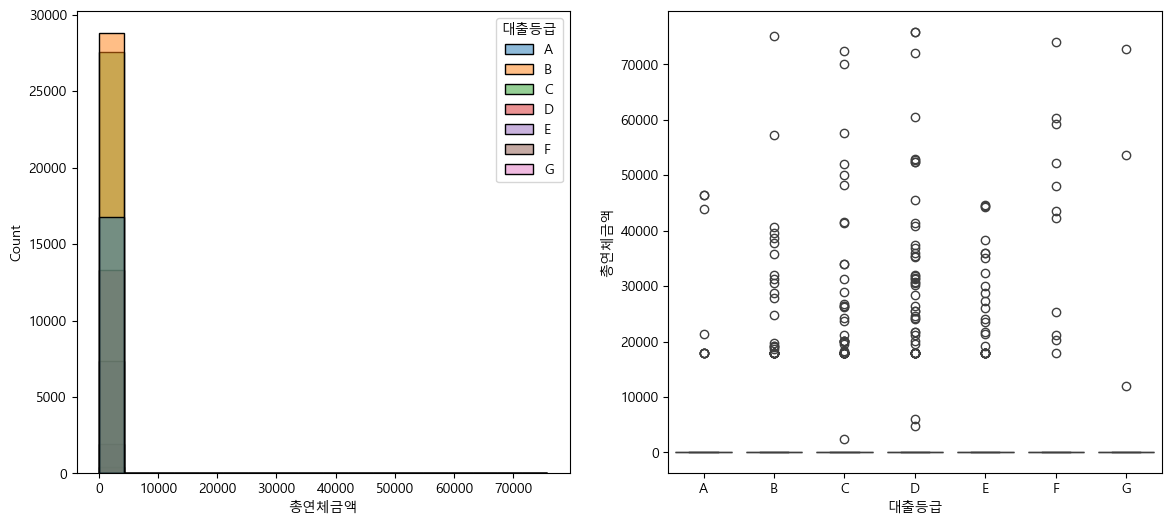

mean          std  min  25%  50%  75%      max
A   14.806105   704.850463  0.0  0.0  0.0  0.0  46536.0
B   29.441371   983.715162  0.0  0.0  0.0  0.0  75216.0
C   48.052565  1258.793440  0.0  0.0  0.0  0.0  72444.0
D  113.352104  2127.823877  0.0  0.0  0.0  0.0  75768.0
E   94.572206  1678.616326  0.0  0.0  0.0  0.0  44688.0
F  237.801433  3437.789928  0.0  0.0  0.0  0.0  74076.0
G  329.942857  4448.705070  0.0  0.0  0.0  0.0  72864.0

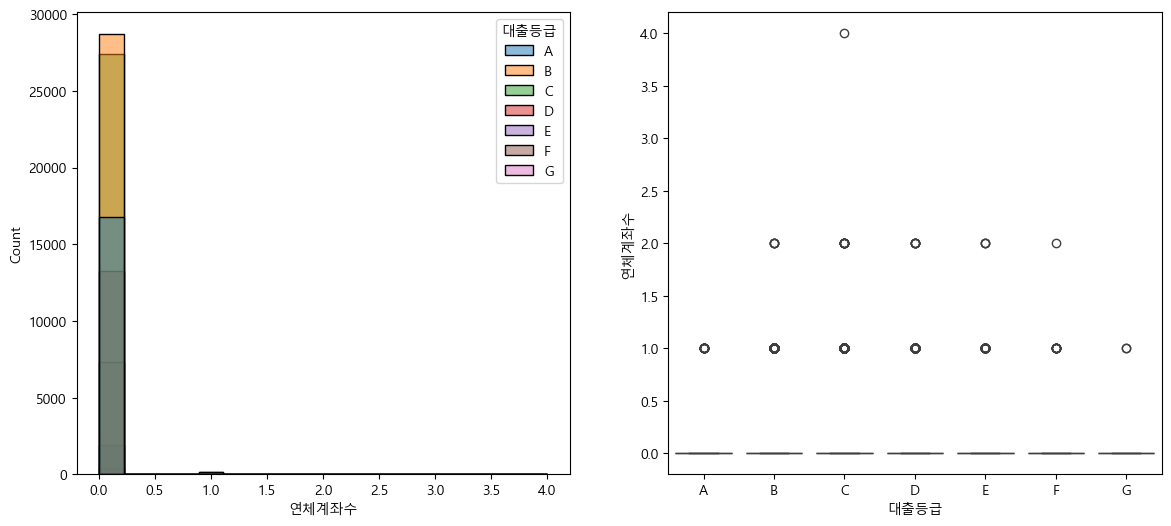

mean       std  min  25%  50%  75%  max
A  0.001133  0.033640  0.0  0.0  0.0  0.0  1.0
B  0.004789  0.071019  0.0  0.0  0.0  0.0  2.0
C  0.007892  0.094808  0.0  0.0  0.0  0.0  4.0
D  0.008462  0.096382  0.0  0.0  0.0  0.0  2.0
E  0.007615  0.091509  0.0  0.0  0.0  0.0  2.0
F  0.006653  0.087385  0.0  0.0  0.0  0.0  2.0
G  0.004762  0.068924  0.0  0.0  0.0  0.0  1.0

In [102]:
for col in list_num:
    
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))
    sns.histplot(data=train_df, x=col, hue='대출등급', ax=ax[0])
    sns.boxplot(data=train_df, y=col, x='대출등급', order=hue_order, ax=ax[1])
    plt.show()
    num_statistic(train_df, col)

### 원핫인코딩

In [ ]:
# 원핫인코딩 수행
train_df = pd.get_dummies(data=train_df, columns=['대출목적','주택소유상태'], dtype=int)
train_df 

In [ ]:
# 원핫인코딩 수행 
test_df = pd.get_dummies(data=test_df, columns=['대출목적', '주택소유상태'], dtype=int)
test_df 
# train_df보다 컬럼 수가 하나 적은 건 Y값인 대출등급이 없기 때문이다.